In [266]:
%load_ext autoreload
%autoreload 2
%precision %e

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'%e'

# Boiler plate
- import all packages
- emulate snakemake so can load config as usual
- load the network you want
TODO: make it easier to restore old runs
TODO: hide all the boiler pates in a file

In [267]:
import logging
import pypsa
import os.path

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd

In [268]:
# running the jupyter notebook on the compute nodes doesnt build the path as expected, you have to manually do this
import IPython

working_directory = os.path.dirname(IPython.extract_module_locals()[1]['__vsc_ipynb_file__'])
workflow_dir = os.path.dirname(working_directory)
root_dir = os.path.dirname(workflow_dir)


os.chdir(working_directory)


In [269]:

# from make_summary import assign_carriers
from _helpers import configure_logging, mock_snakemake
from constants import PLOT_COST_UNITS, PLOT_CAP_UNITS,PLOT_SUPPLY_UNITS

logger = logging.getLogger(__name__)


In [270]:
PLANNING_YEAR = 2055
snakemake = mock_snakemake(
    "plot_network",
    snakefile_path=os.path.abspath("../"),
    topology="current+FCG",
    co2_pathway="exp175price2",
    planning_horizons=PLANNING_YEAR,
    heating_demand="positive",
)

configure_logging(snakemake, logger=logger)
config = snakemake.config
tech_colors = config["plotting"]["tech_colors"]


ntw_path = snakemake.input.network

# ntw_path = f"/home/ivanra/downloads/PaperResultsXiaowei_networks/postnetwork-ll-current+Neighbor-exponential175-{PLANNING_YEAR}.nc"
# ntw_path = "/p/tmp/ivanra/xiaowei-pypsa/PyPSA-China/results/version-0325.175.1H/postnetworks/positive/postnetwork-ll-current+Neighbor-exponential175-2060.nc"
n = pypsa.Network(ntw_path)
results_dir = os.path.dirname(os.path.dirname(ntw_path))
results_dir 


2025-04-03 16:09:28,032 - _helpers.py - INFO - =========== NEW RUN ===========
2025-04-03 16:09:28,032 - _helpers.py - INFO - =========== NEW RUN ===========
2025-04-03 16:09:28,032 - _helpers.py - INFO - =========== NEW RUN ===========
INFO:__main__:=========== NEW RUN ===========
Index(['Anhui Sabatier', 'Beijing Sabatier', 'Chongqing Sabatier',
       'Fujian Sabatier', 'Gansu Sabatier', 'Guangdong Sabatier',
       'Guangxi Sabatier', 'Guizhou Sabatier', 'Hainan Sabatier',
       'Hebei Sabatier', 'Heilongjiang Sabatier', 'Henan Sabatier',
       'Hubei Sabatier', 'Hunan Sabatier', 'InnerMongolia Sabatier',
       'Jiangsu Sabatier', 'Jiangxi Sabatier', 'Jilin Sabatier',
       'Liaoning Sabatier', 'Ningxia Sabatier', 'Qinghai Sabatier',
       'Shaanxi Sabatier', 'Shandong Sabatier', 'Shanghai Sabatier',
       'Shanxi Sabatier', 'Sichuan Sabatier', 'Tianjin Sabatier',
       'Tibet Sabatier', 'Xinjiang Sabatier', 'Yunnan Sabatier',
       'Zhejiang Sabatier'],
      dtype='object

'/p/tmp/ivanra/PyPSA-China-PIK/results/v-0.2.0_test_co2_bdgt_elonly_fossilGen/overnight_co2pw-exp175price2_topo-current+FCG_proj-positive'

### Fix network for plotting // add missing info

In [271]:
from _plot_utilities import fix_network_names_colors, determine_plottable
from plot_network import plot_cost_map, plot_map
fix_network_names_colors(n, config)
determine_plottable(n)

/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/_plot_utilities.py:169: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.carriers.color.fillna(NAN_COLOR, inplace=True)


# Plot maps

### plot capex

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/plot_network.py:183: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/plot_network.py:337: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


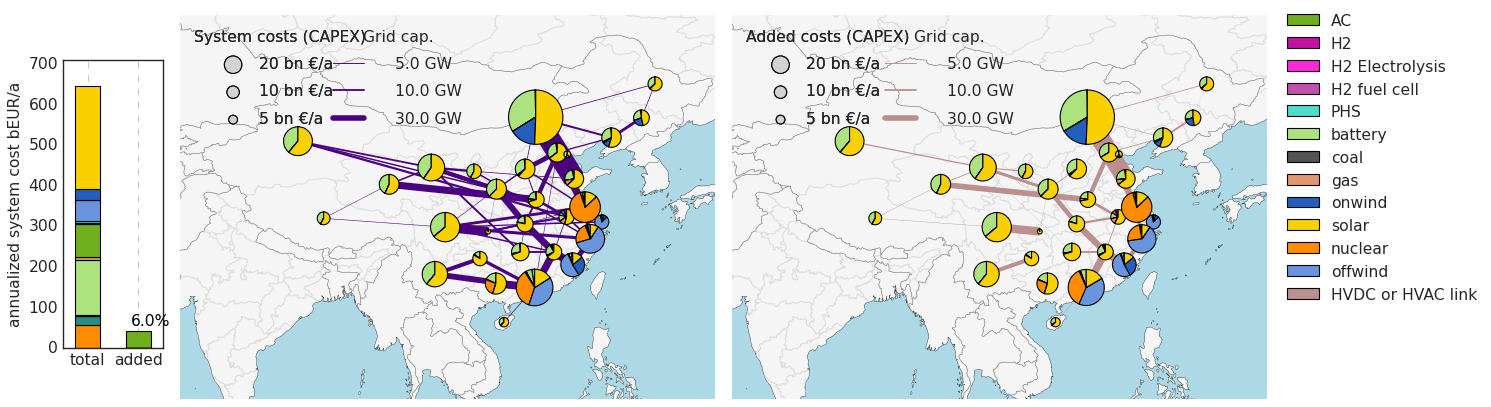

In [272]:
ax = plot_cost_map(n, config["plotting"], cost_pannel=True, capex_only=True)

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/plot_network.py:183: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/plot_network.py:337: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


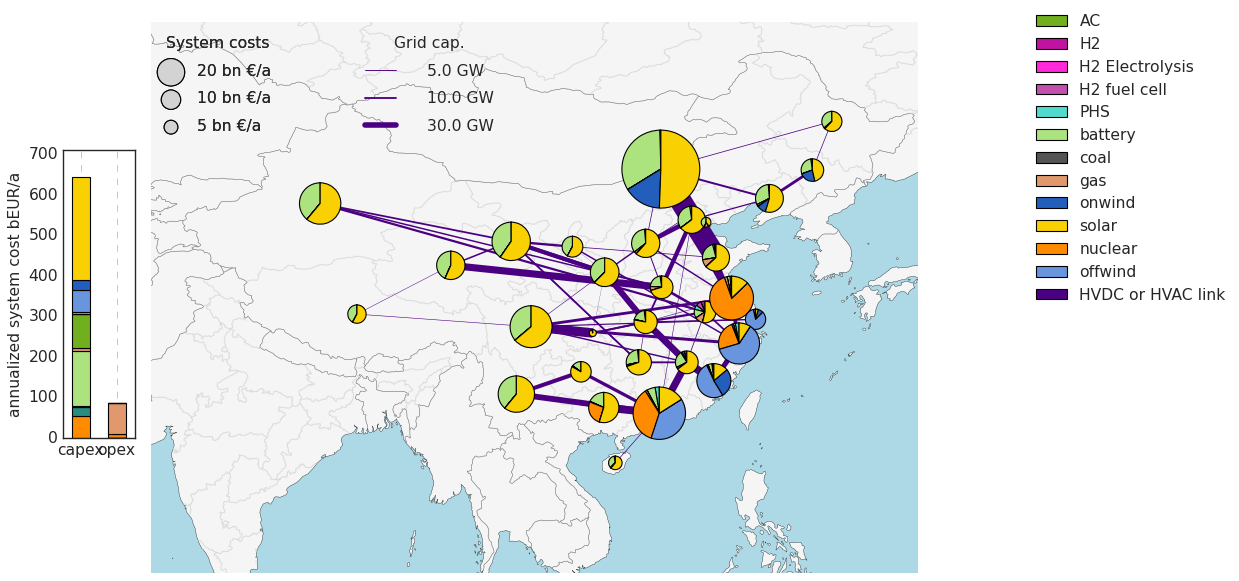

In [273]:
# TODO fix layout
ax = plot_cost_map(n, config["plotting"], cost_pannel=True, plot_additions=False, capex_only=False)

## plot electricy generation map

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/plot_network.py:492: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/plot_network.py:453: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


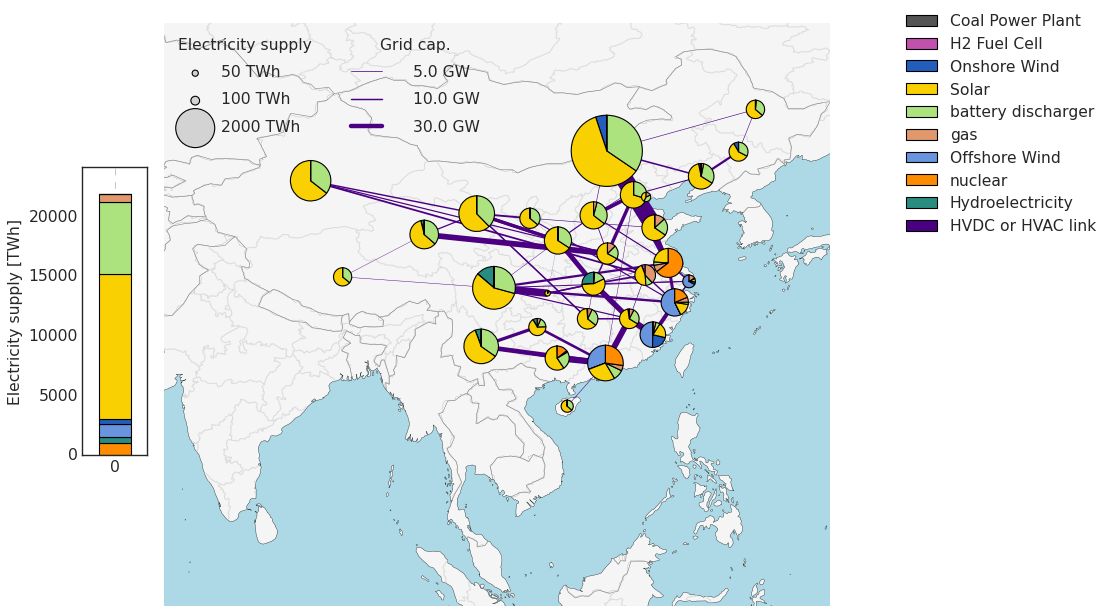

In [274]:
from plot_network import plot_energy_map
from _plot_utilities import set_plot_style
set_plot_style(
    style_config_file= os.path.abspath("../../config/plotting_styles/network_map.mplstyle"),
    base_styles=["classic", "seaborn-v0_8-white"],
)
plot_energy_map(n,config["plotting"], carrier="AC", components = ["Generator", "Link"])

In [275]:
from plot_network import plot_energy_map
from _plot_utilities import set_plot_style

if snakemake.config["heat_coupling"]:
    set_plot_style(
        style_config_file= os.path.abspath("../../config/plotting_styles/network_map.mplstyle"),
        #snakemake.config["plotting"]["network_style_config_file"],
        base_styles=["classic", "seaborn-v0_8-white"],
    )
    plot_energy_map(n,config["plotting"], carrier="heat", components = ["Generator", "Link"])

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


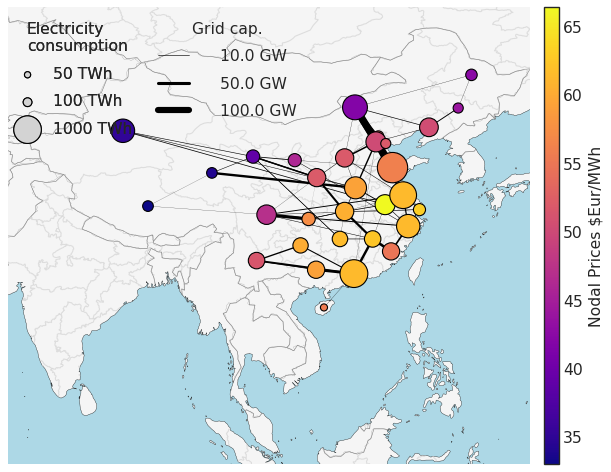

In [276]:
from plot_network import plot_nodal_prices
plot_nodal_prices(n, config["plotting"], "AC")

## plot capacity

## plot cost

### Plot nodal prices

## Interactive plot map

In [277]:

import numpy as np
# make names and link sizes, make sure we only plot AC, DC & statiosn
ac_links = n.links[n.links.carrier == "AC"]
colors = n.links.index.to_series().apply(lambda x: 'black' if 'ext' in x else 'pink')
widths = np.log(n.links.p_nom_opt + 3) / 2
widths[~widths.index.isin(ac_links.index)] = 0
widths[widths.index.str.contains('reversed')] = 0
names = n.links.copy()
names["name"] = names.index.values
names.loc[~names.index.isin(ac_links.index), "p_nom_opt"] = ""
names.loc[~names.index.isin(ac_links.index), "name"] = ""
buses = n.buses.copy()
buses["name"] = buses.apply(lambda x: f"{x.name}" if x.carrier == "AC" or x.carrier=="stations" else "", axis=1)
buses["sizes"] = buses.apply(lambda x:10 if x.carrier == "AC" or x.carrier=="stations" else 0, axis=1)
buses["colors"] = buses.apply(lambda x: "black" if x.carrier == "AC" else "red", axis=1)
buses.carrier.unique()
ax = n.iplot(link_colors=colors, link_widths=widths, link_text = names.p_nom_opt.astype(str) + names.name, bus_text=buses.name, bus_sizes=buses.sizes, bus_colors=buses.colors)

/p/tmp/ivanra/anaconda/ipykernel_4005664/1096144582.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  names.loc[~names.index.isin(ac_links.index), "p_nom_opt"] = ""


### extendable lines

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


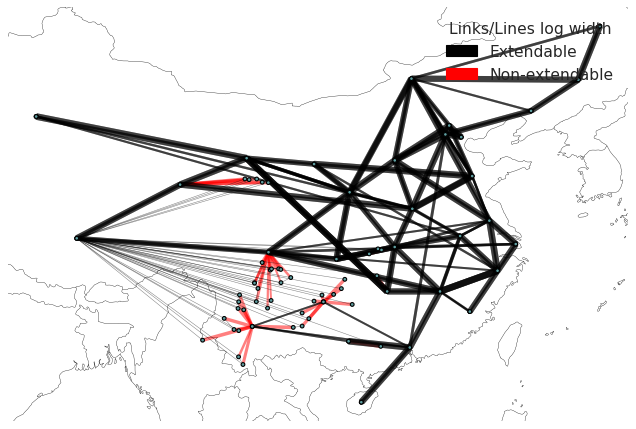

In [278]:

fig, ax = plt.subplots(1, 1, figsize=(10, 10),subplot_kw={"projection":ccrs.PlateCarree()})
def width(x):
    return np.log10(x/1e6).where(x>1,0)
n.plot(ax = ax,link_colors=n.links.p_nom_extendable.apply(lambda x: "red" if not x else "black"),line_colors=n.lines.s_nom_extendable.apply(lambda x: "red" if not x else "black"), link_widths= width(n.links.p_nom_opt) , line_widths=width(n.lines.s_nom_opt), link_alpha=0.5)
# Create custom legend
import matplotlib.patches as mpatches
extendable_patch = mpatches.Patch(color='black', label='Extendable')
non_extendable_patch = mpatches.Patch(color='red', label='Non-extendable')
ax.legend(handles=[extendable_patch, non_extendable_patch], title = "Links/Lines log width")

# Shadow prices & prices

In [279]:
from make_summary import make_summaries
summaries = make_summaries({("exp175-paper", PLANNING_YEAR):ntw_path})

INFO:make_summary:Make summary for scenario ('exp175-paper', 2055), using /p/tmp/ivanra/PyPSA-China-PIK/results/v-0.2.0_test_co2_bdgt_elonly_fossilGen/overnight_co2pw-exp175price2_topo-current+FCG_proj-positive/postnetworks/ntwk_2055.nc
Index(['Anhui Sabatier', 'Beijing Sabatier', 'Chongqing Sabatier',
       'Fujian Sabatier', 'Gansu Sabatier', 'Guangdong Sabatier',
       'Guangxi Sabatier', 'Guizhou Sabatier', 'Hainan Sabatier',
       'Hebei Sabatier', 'Heilongjiang Sabatier', 'Henan Sabatier',
       'Hubei Sabatier', 'Hunan Sabatier', 'InnerMongolia Sabatier',
       'Jiangsu Sabatier', 'Jiangxi Sabatier', 'Jilin Sabatier',
       'Liaoning Sabatier', 'Ningxia Sabatier', 'Qinghai Sabatier',
       'Shaanxi Sabatier', 'Shandong Sabatier', 'Shanghai Sabatier',
       'Shanxi Sabatier', 'Sichuan Sabatier', 'Tianjin Sabatier',
       'Tibet Sabatier', 'Xinjiang Sabatier', 'Yunnan Sabatier',
       'Zhejiang Sabatier'],
      dtype='object', name='name')
INFO:pypsa.io:Imported network

# CO2 emissions & Stores


In [280]:
n.global_constraints

Empty DataFrame
Columns: [type, investment_period, carrier_attribute, sense, constant, mu]
Index: []

<Axes: xlabel='snapshot'>

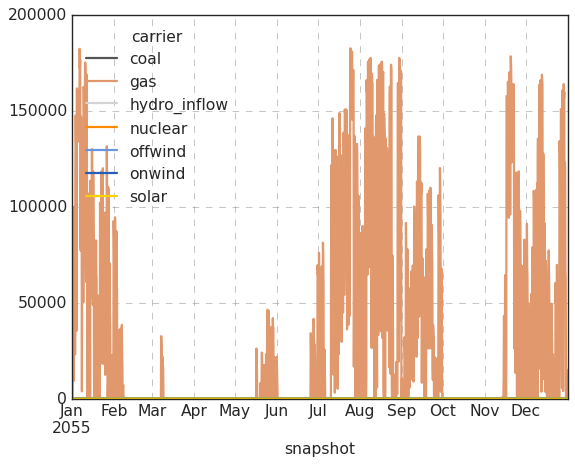

In [281]:
fig, ax = plt.subplots()
# calc the t resolved CO2 emissions from generators
time_res_emissions = ((n.generators_t.p/ n.generators.efficiency)* n.generators.carrier.map(n.carriers.co2_emissions)).T.groupby(n.generators.carrier).sum()
colors = time_res_emissions.T.columns.map(tech_colors).fillna("lightgrey")
time_res_emissions.T.plot(ax =ax, color =  colors, legend = True)

Text(0, 0.5, 'cum CO2 emissions [t]')

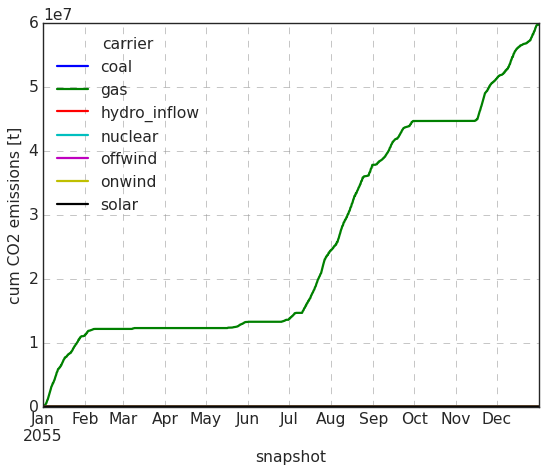

In [282]:
gen_emissions = ((n.generators_t.p/ n.generators.efficiency)* n.generators.carrier.map(n.carriers.co2_emissions)).T.groupby(n.generators.carrier).sum().T.cumsum()
fig, ax = plt.subplots()
gen_emissions.where(gen_emissions>=0).dropna(axis=1, how="all").plot(ax=ax)
ax.set_ylabel("cum CO2 emissions [t]")


Overnight model does not have CO2 capture or biomass stores, skipped


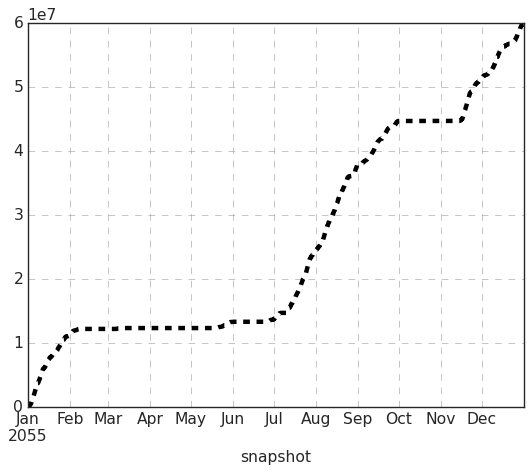

In [283]:
try:
    fig, ax = plt.subplots()
    # calc the t resolved CO2 emissions from generators
    ((n.generators_t.p/ n.generators.efficiency)* n.generators.carrier.map(n.carriers.co2_emissions)).T.groupby(n.generators.carrier).sum().sum().T.cumsum().plot(ax =ax, label = "CO2 emissions (cum)", lw=4, c ="black", ls = "--")
    n.stores_t.e.T.groupby(n.stores.carrier).sum().loc[["CO2","H2", "CO2 capture", "gas", "biomass"]].T.plot(lw=4, cmap ="jet", ax =ax)
    ax.legend()
    ax.semilogy()
    ax.set_ylim(1e3,1e10)
    ax.set_ylabel("carrier stock")
except KeyError:
    print("Overnight model does not have CO2 capture or biomass stores, skipped")

<Axes: xlabel='snapshot'>

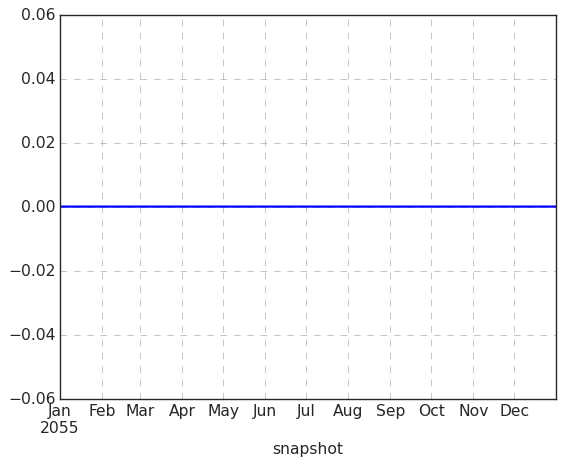

In [284]:

gas_stores = n.stores[n.stores.carrier.str.contains("gas")]
gas_stores_t = n.stores_t.e[n.stores_t.e.columns.intersection(gas_stores.index)]
gas_stores_t.sum(axis=1).plot()

## CO2 capture
! beware the store is the difference :)

In [285]:
try:
    stores = n.stores_t.e.T.groupby(n.stores.carrier).sum()
    diff = stores.iloc[:, -1] -stores.iloc[:, 0]
    co2_cap = stores.iloc[:, -1].loc[["CO2 capture"]].sum()
    co2_cap
except KeyError:
    print("Overnight model does not have CO2 capture or biomass stores, skipped")


Overnight model does not have CO2 capture or biomass stores, skipped


<Axes: xlabel='snapshot'>

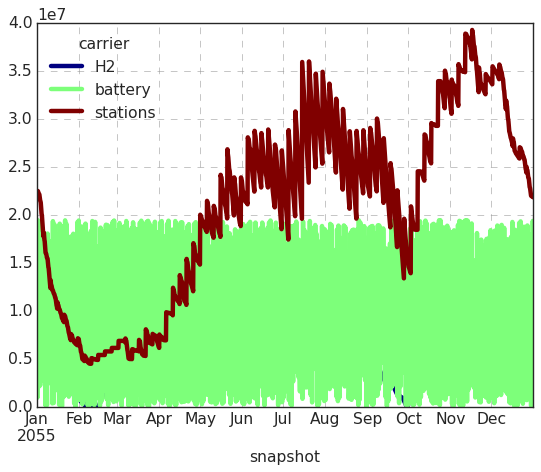

In [286]:
n.stores_t.e.T.groupby(n.stores.carrier).sum().T.plot(lw=4, cmap ="jet")

# Time series

## Weekly energy balances

In [287]:
from plot_time_series import plot_energy_balance

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1798: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, None)


Text(0.5, 1.0, 'Electricity Balance')

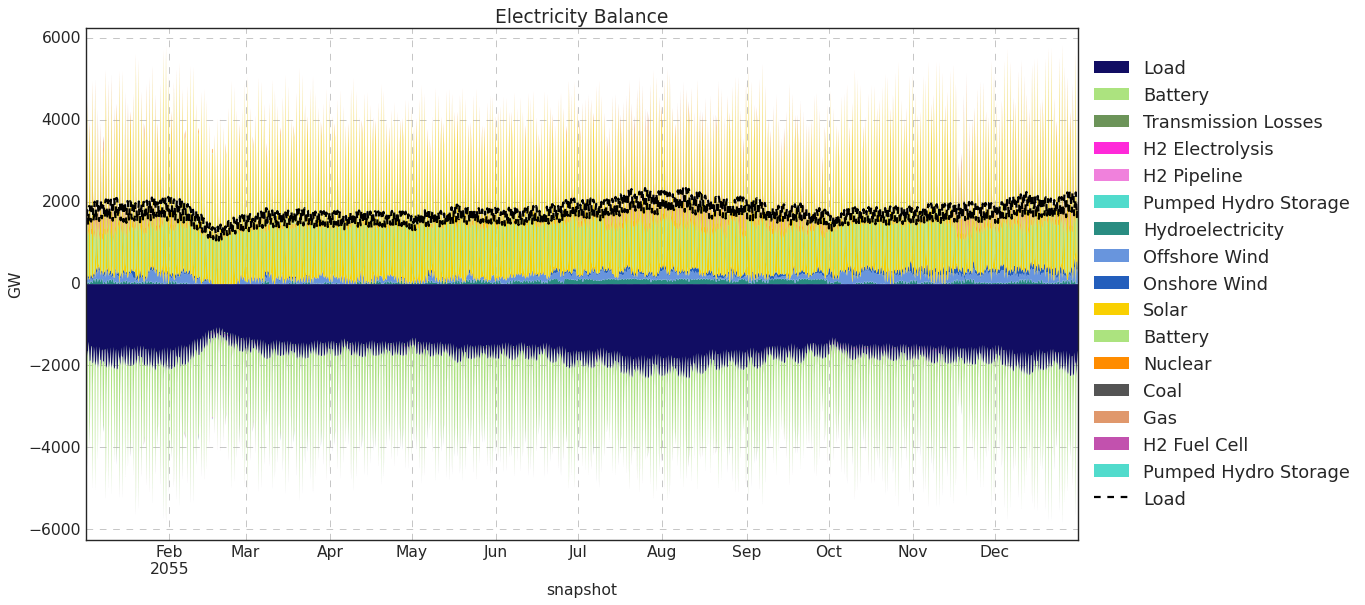

In [288]:
ax = plot_energy_balance(n, config["plotting"], start_date=f"{PLANNING_YEAR}-01-01 01:00", end_date=f"{PLANNING_YEAR}-12-31 12:00:00")
ax.grid(axis='y')
ax.set_title("Electricity Balance")

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1798: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, None)


Text(0.5, 1.0, 'Electricity Balance')

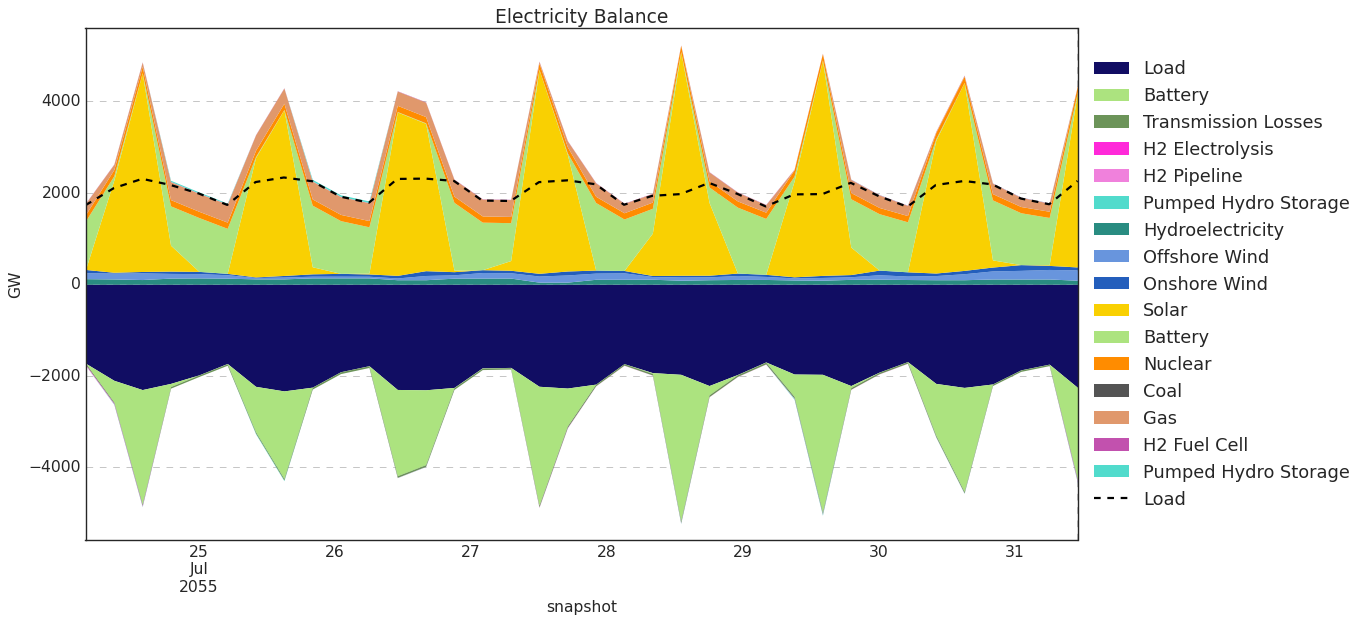

In [289]:
ax = plot_energy_balance(n, config["plotting"], start_date=f"{PLANNING_YEAR}-07-24 00:00", end_date=f"{PLANNING_YEAR}-07-31 12:00:00")
ax.grid(axis='y')
ax.set_title("Electricity Balance")

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1798: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, None)


Text(0.5, 1.0, 'Electricity Balance')

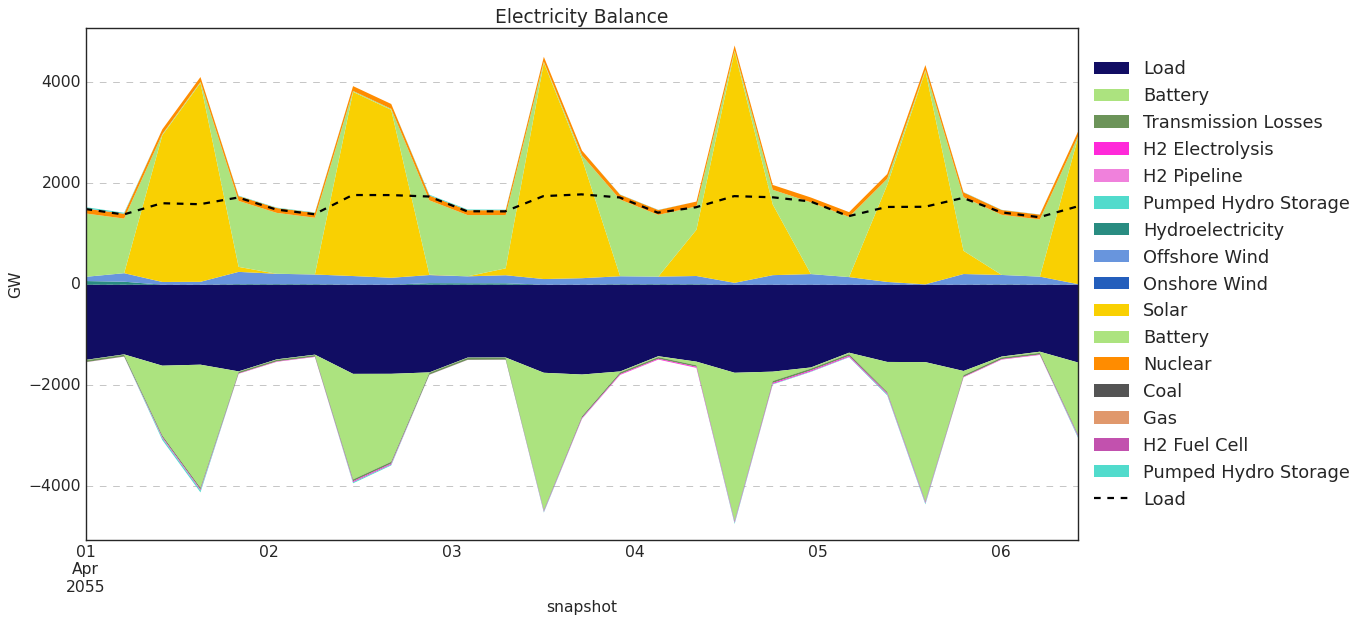

In [290]:
ax = plot_energy_balance(n, config["plotting"], start_date=f"{PLANNING_YEAR}-03-31 21:00", end_date=f"{PLANNING_YEAR}-04-06 12:00:00")
ax.grid(axis='y')
ax.set_title("Electricity Balance")

## price series

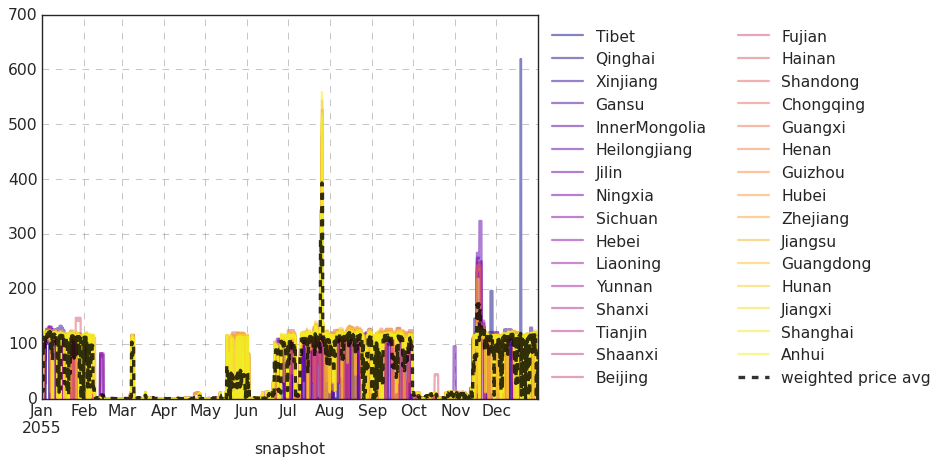

In [291]:
from constants import PROV_NAMES 
marginal_price_series = n.buses_t["marginal_price"][PROV_NAMES]
prov_max_price_series = marginal_price_series.T.max()
prov_min_price_series = marginal_price_series.T.min()
spread = marginal_price_series.T.max()-marginal_price_series.T.min()
load_ac = n.statistics.withdrawal(bus_carrier="AC", aggregate_time=False, groupby="location", comps = "Load")

regional_weighed_price = marginal_price_series.T.mul(load_ac).T.sum()/load_ac.T.sum()
order =regional_weighed_price.sort_values().index

weighed_prices = (marginal_price_series.T.mul(load_ac)/load_ac.sum()).sum()
ax = marginal_price_series[order].plot(alpha=0.5, lw=2, legend=False, cmap="plasma")
weighed_prices.plot(ax = ax, lw=3, c="black", label = "weighted price avg", alpha =0.8, ls = "--")
ax.legend(  loc='upper left', bbox_to_anchor=(1, 1), ncols=2)

calculated prices


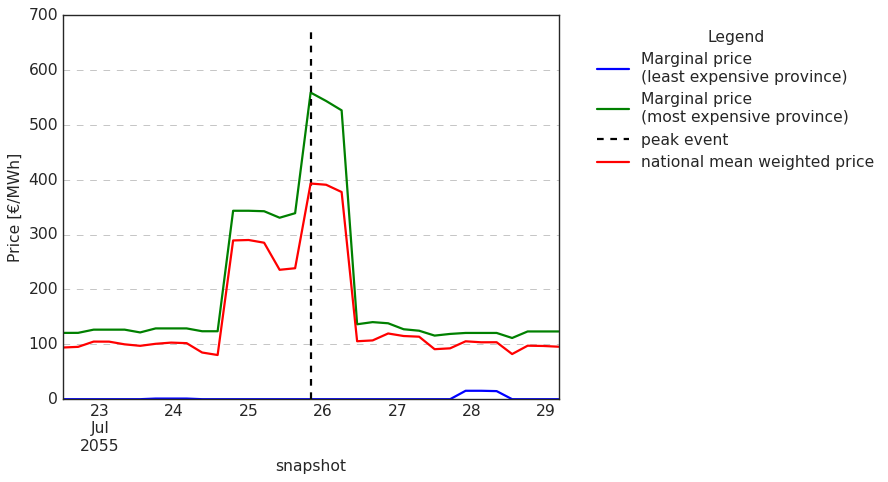

In [292]:
from _plot_utilities import find_weeks_of_interest
from constants import PROV_NAMES

winter_week, summer_week = find_weeks_of_interest(n, f"{PLANNING_YEAR}-04-01", f"{PLANNING_YEAR}-10-06")
marginal_price_series = n.buses_t["marginal_price"][PROV_NAMES]
prov_max_price_series = marginal_price_series.T.max()
prov_min_price_series = marginal_price_series.T.min()
spread = marginal_price_series.T.max()-marginal_price_series.T.min()
load_ac = n.statistics.withdrawal(bus_carrier="AC", aggregate_time=False, groupby="location", comps = "Load")
weighed_prices = (marginal_price_series.T.mul(load_ac)/load_ac.sum()).sum()
print("calculated prices")

ax = prov_min_price_series.loc[summer_week].plot(label = "Marginal price\n(least expensive province)")
prov_max_price_series.loc[summer_week].plot(label = "Marginal price\n(most expensive province)", ax =ax)
# spread.loc[summer_week].plot(label = "Price spread", ax =ax, ls= "--")
ax.set_ylabel("Price [€/MWh]")
# ax.vlines(winter_week[len(winter_week)//2], 0,prov_max_price_series.max()*1.2, color="black", ls = "--", label="peak event")
ax.vlines(summer_week[len(summer_week)//2], 0,prov_max_price_series.loc[summer_week].max()*1.2, color="black", ls ="--", label="peak event")

weighed_prices.loc[summer_week].plot(ax=ax, label ="national mean weighted price")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Legend")

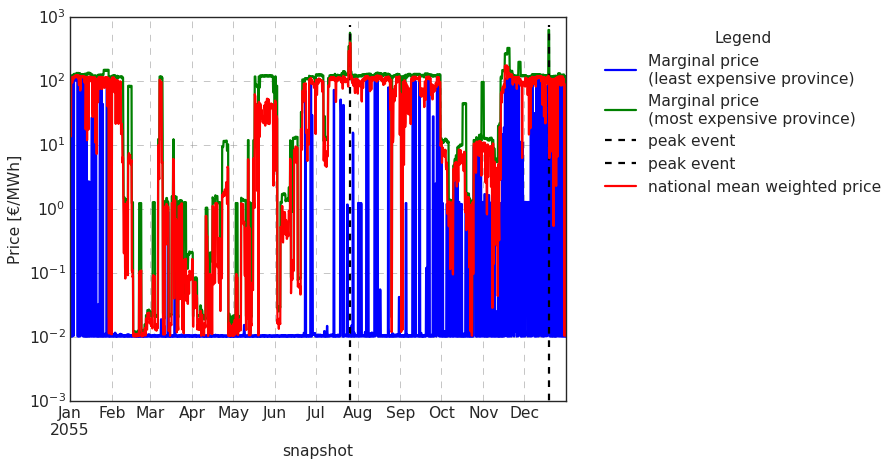

In [293]:

ax = prov_min_price_series.plot(label = "Marginal price\n(least expensive province)", logy=True)
ax = prov_max_price_series.plot(label = "Marginal price\n(most expensive province)", logy=True)
ax.set_ylabel("Price [€/MWh]")
ax.vlines(winter_week[len(winter_week)//2], 0,prov_max_price_series.max()*1.2, color="black", ls = "--", label="peak event")
ax.vlines(summer_week[len(summer_week)//2], 0,prov_max_price_series.max()*1.2, color="black", ls ="--", label="peak event")

weighed_prices.plot(ax=ax, label ="national mean weighted price", logy=True)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Legend")

## Prices - balance overlay

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1798: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, None)


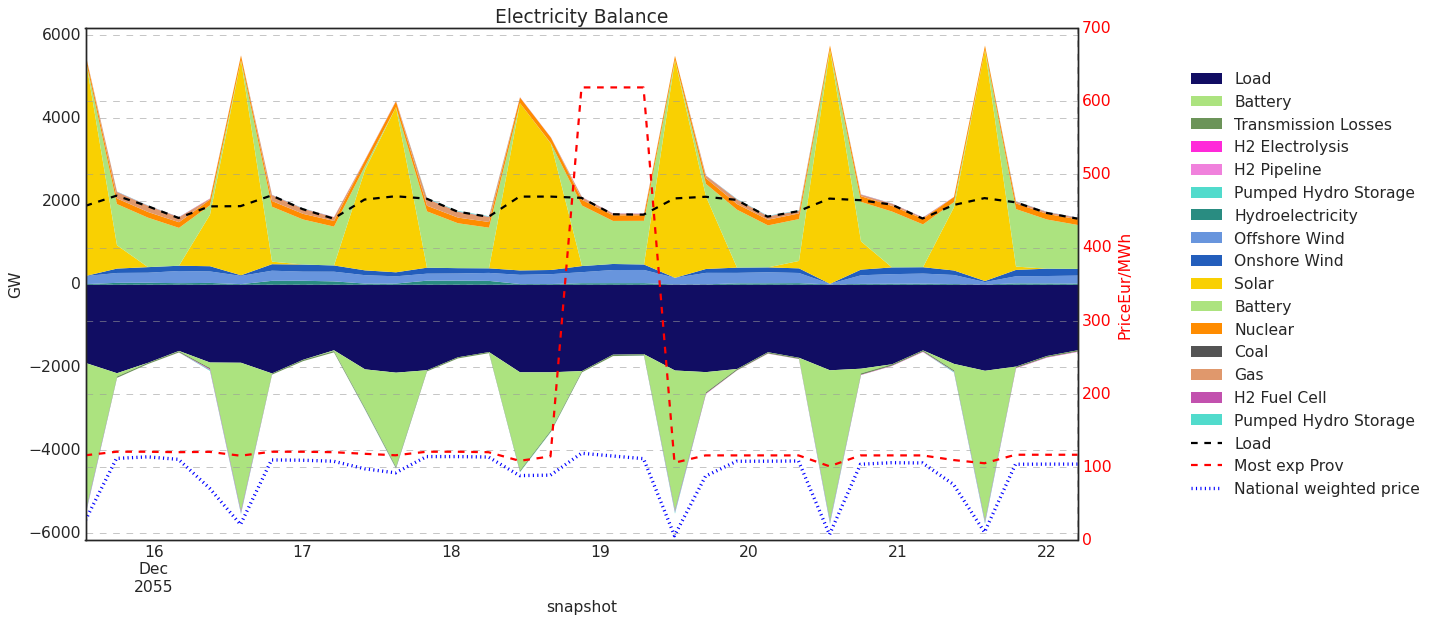

In [294]:
ax = plot_energy_balance(n, config["plotting"], start_date=str(winter_week[0]), end_date=str(winter_week[-1]))
ax.grid(axis='y')
ax.set_title("Electricity Balance")
ax2 = ax.twinx()
prov_max_price_series.loc[winter_week].plot(ax=ax2, color="red", lw=2, ls = "--", label= "Most exp Prov")
weighed_prices.loc[winter_week].plot(ax=ax2, color = "blue", lw=3, ls = ":",label = "National weighted price")
fig = ax.get_figure()
ax2.set_ylabel("PriceEur/MWh", color="red")
ax2.tick_params(axis='y', labelcolor='red')
# Move the existing legend to the right
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax.legend(handles + handles2, labels + labels2, loc='center left', bbox_to_anchor=(1.1, 0.5))


/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1798: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, None)


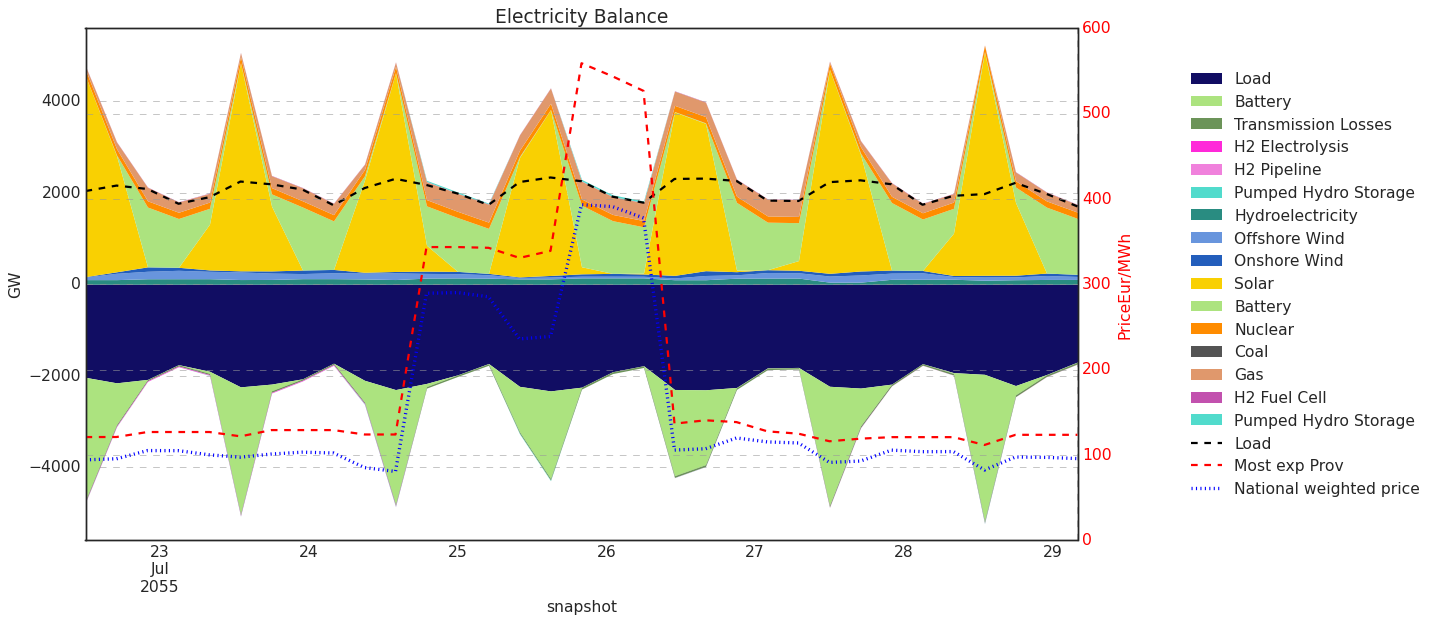

In [295]:
ax = plot_energy_balance(n, config["plotting"], start_date=str(summer_week[0]), end_date=str(summer_week[-1]))
ax.grid(axis='y')
ax.set_title("Electricity Balance")
ax2 = ax.twinx()
prov_max_price_series.loc[summer_week].plot(ax=ax2, color="red", lw=2, ls = "--", label= "Most exp Prov")
weighed_prices.loc[summer_week].plot(ax=ax2, color = "blue", lw=3, ls = ":",label = "National weighted price")
fig = ax.get_figure()
ax2.set_ylabel("PriceEur/MWh", color="red")
ax2.tick_params(axis='y', labelcolor='red')
# Move the existing legend to the right
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax.legend(handles + handles2, labels + labels2, loc='center left', bbox_to_anchor=(1.1, 0.5))


In [296]:
n.global_constraints

Empty DataFrame
Columns: [type, investment_period, carrier_attribute, sense, constant, mu]
Index: []

In [297]:
if snakemake.config["heat_coupling"]:
    ax = plot_energy_balance(n, config["plotting"], start_date=f"{PLANNING_YEAR}-03-31 21:00", end_date=f"{PLANNING_YEAR}-09-06 12:00:00", bus_carrier="heat")
    ax.set_title("Heat balance")
    ax2 = ax.twinx()
    prov_max_price_series.loc[f"{PLANNING_YEAR}-03-31 21:00":f"{PLANNING_YEAR}-09-06 12:00:00"].plot(ax=ax2, color="red", lw=2, ls = "--", label= "Most exp Prov")
    weighed_prices.loc[f"{PLANNING_YEAR}-03-31 21:00":f"{PLANNING_YEAR}-09-06 12:00:00"].plot(ax=ax2, color = "blue", lw=3, ls = ":",label = "National weighted price")
    prov_min_price_series.loc[f"{PLANNING_YEAR}-03-31 21:00":f"{PLANNING_YEAR}-09-06 12:00:00"].plot(ax=ax2, color="green", lw=2, ls = "--", label= "Least exp Prov")

    fig = ax.get_figure()
    ax2.set_ylabel("PriceEur/MWh", color="red")
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylim([0, prov_max_price_series.loc[f"{PLANNING_YEAR}-03-31 21:00":f"{PLANNING_YEAR}-09-06 12:00:00"].max()*3])
    # Move the existing legend to the right
    handles, labels = ax.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(handles + handles2, labels + labels2, loc='center left', bbox_to_anchor=(1.1, 0.5))


In [298]:
if snakemake.config["heat_coupling"]:
    ax = plot_energy_balance(n, config["plotting"], start_date=f"{PLANNING_YEAR}-01-01 00:00", end_date=f"{PLANNING_YEAR}-12-31 23:00:00", bus_carrier="heat")
    ax.set_title("Heat balance")

# LOAD DURATION CURVES

<Axes: xlabel='Hours', ylabel='Residual Load [GW]'>

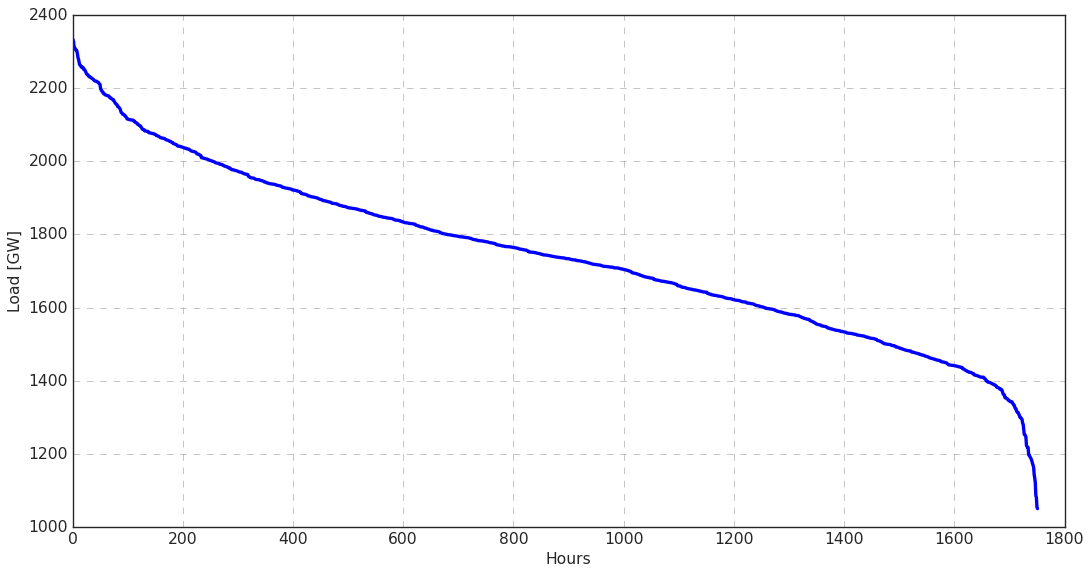

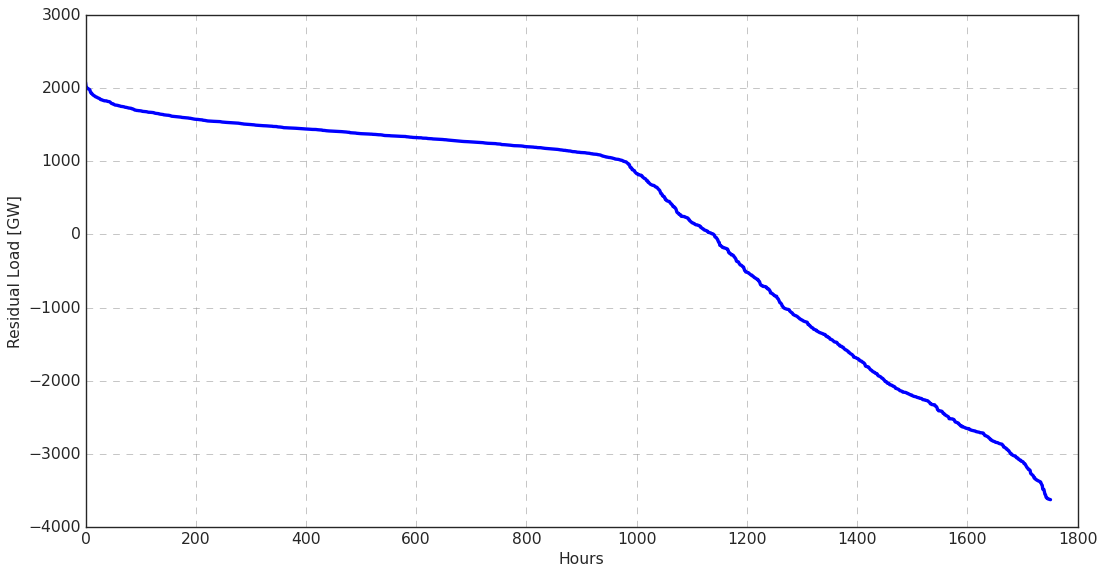

In [299]:
from plot_time_series import plot_residual_load_duration_curve, plot_load_duration_curve

plot_load_duration_curve(n, carrier="AC")
plot_residual_load_duration_curve(n)

In [300]:
(n.statistics.expanded_capex().sum()+n.statistics.opex().sum())

6.636966e+11

In [301]:
n.objective

6.636966e+11

<Axes: xlabel='Hours', ylabel='Load [GW]'>

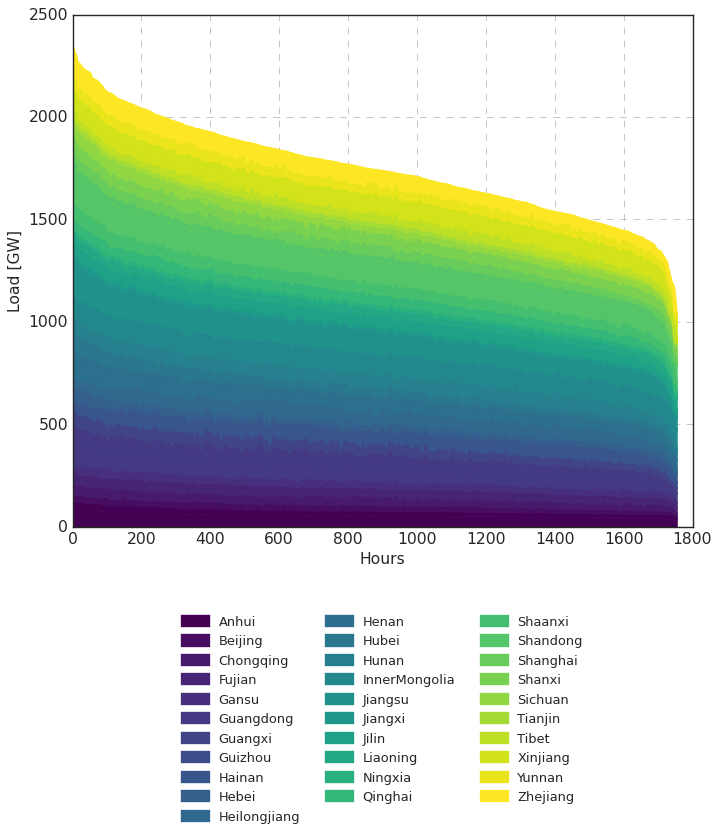

In [302]:
from plot_time_series import plot_regional_load_durations

plot_regional_load_durations(n, carrier="AC", cmap = "viridis")


Text(0, 0.5, 'EnergyDemand / GW')

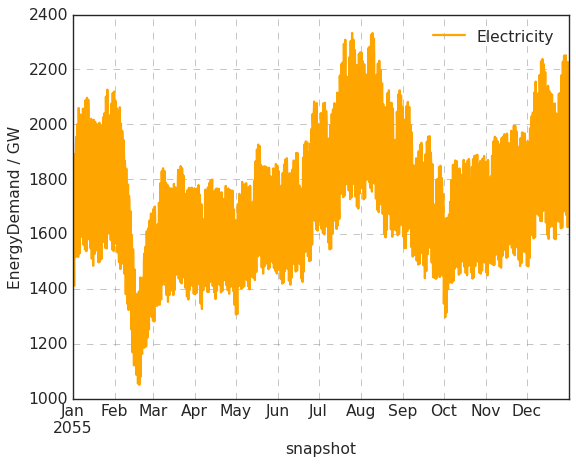

In [303]:
fix, ax = plt.subplots()
ds_AC = n.statistics.withdrawal(bus_carrier="AC", aggregate_time=False).loc[("Load", "-")]/1e3
ds_AC.plot(ax=ax, label="Electricity",  c="orange")
if snakemake.config["heat_coupling"]:
    ds_heat = n.statistics.withdrawal(bus_carrier="heat", aggregate_time=False).loc[("Load", "-")]/1e3
    ds_heat.plot(ax=ax, label="Heat", c = "blue")  
ax.legend()
ax.set_ylabel("EnergyDemand / GW")

## Power flows map

Text(0, 0.5, 'Transmission [TWh]')

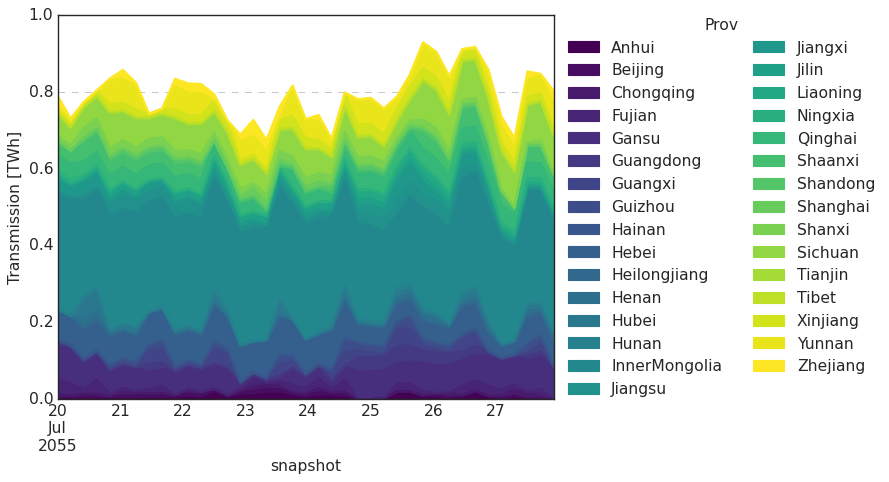

In [304]:
from _pypsa_helpers import get_location_and_carrier
transmission = n.statistics.transmission(
        bus_carrier="AC",
        groupby=get_location_and_carrier,
        aggregate_time=False,
    )
ax = (
    (transmission/1e6)
    .groupby("location")
    .sum()
    .T.loc[f"{PLANNING_YEAR}-07-20":f"{PLANNING_YEAR}-07-27"]
    .plot.area(stacked=True, cmap="viridis")
)
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Prov", ncols=2)
ax.set_ylabel("Transmission [TWh]")

### Plot cap factors time series

In [305]:
capacity_factors = n.statistics.capacity_factor(aggregate_time=False).loc[["Generator"]].droplevel(0).T

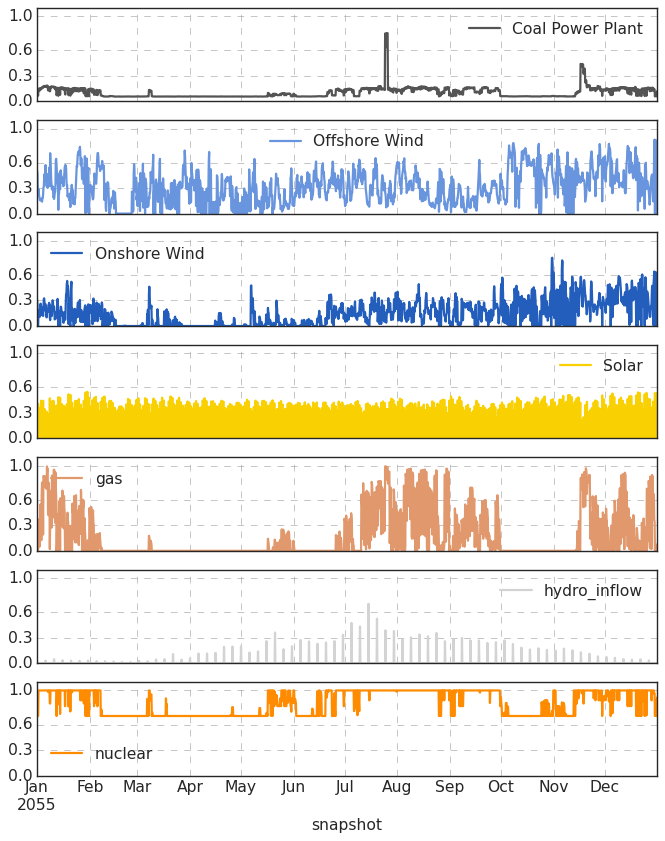

In [306]:
colors_lowered = {k.lower().rstrip():v for k,v in config["plotting"]["tech_colors"].items()}
cap_colors = {k: colors_lowered.get(k.lower().rstrip(), "lightgrey") for k in [c for c in capacity_factors.columns]}
axes = capacity_factors.dropna(axis=1, how="all").fillna(0).plot(subplots=True, figsize=(10,12), color= cap_colors)
for ax in axes:
    ax.set_ylim([0,1.1])
    ax.set_yticks([0,0.3, 0.6,1])

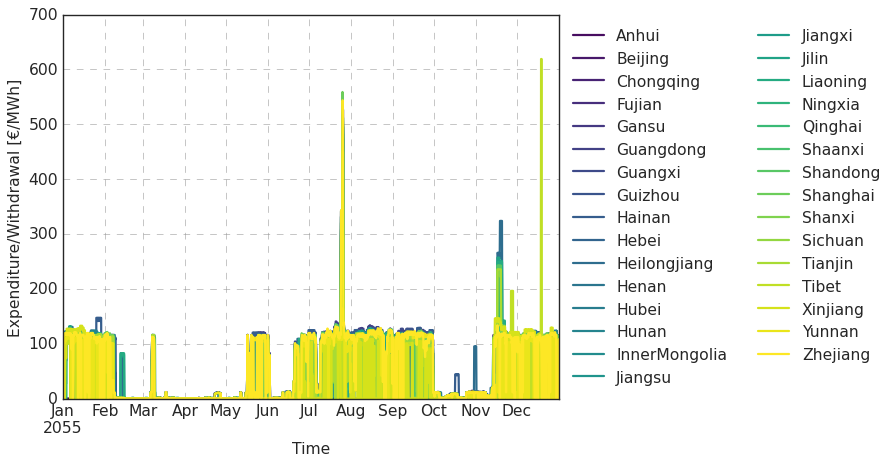

In [307]:
region_rev = n.statistics.revenue(groupby = ["location", "carrier"], bus_carrier="AC", aggregate_time=False).fillna(0)
rev_regional = region_rev[(region_rev<0).all(axis=1)].groupby("location").sum().T
prod_reg = n.statistics.energy_balance(groupby = ["location", "carrier"], bus_carrier="AC", aggregate_time=False)
consum_regional = prod_reg[(prod_reg<0).all(axis=1)].groupby("location").sum().T
supp_regional = prod_reg[(prod_reg>0).all(axis=1)].groupby("location").sum().T
ax = (rev_regional/consum_regional).plot(cmap="viridis")
ax.set_ylabel("Expenditure/Withdrawal [€/MWh]")
ax.set_xlabel("Time")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncols=2)


In [308]:
supp_regional = prod_reg[(prod_reg>0).all(axis=1)].groupby("location").sum().T


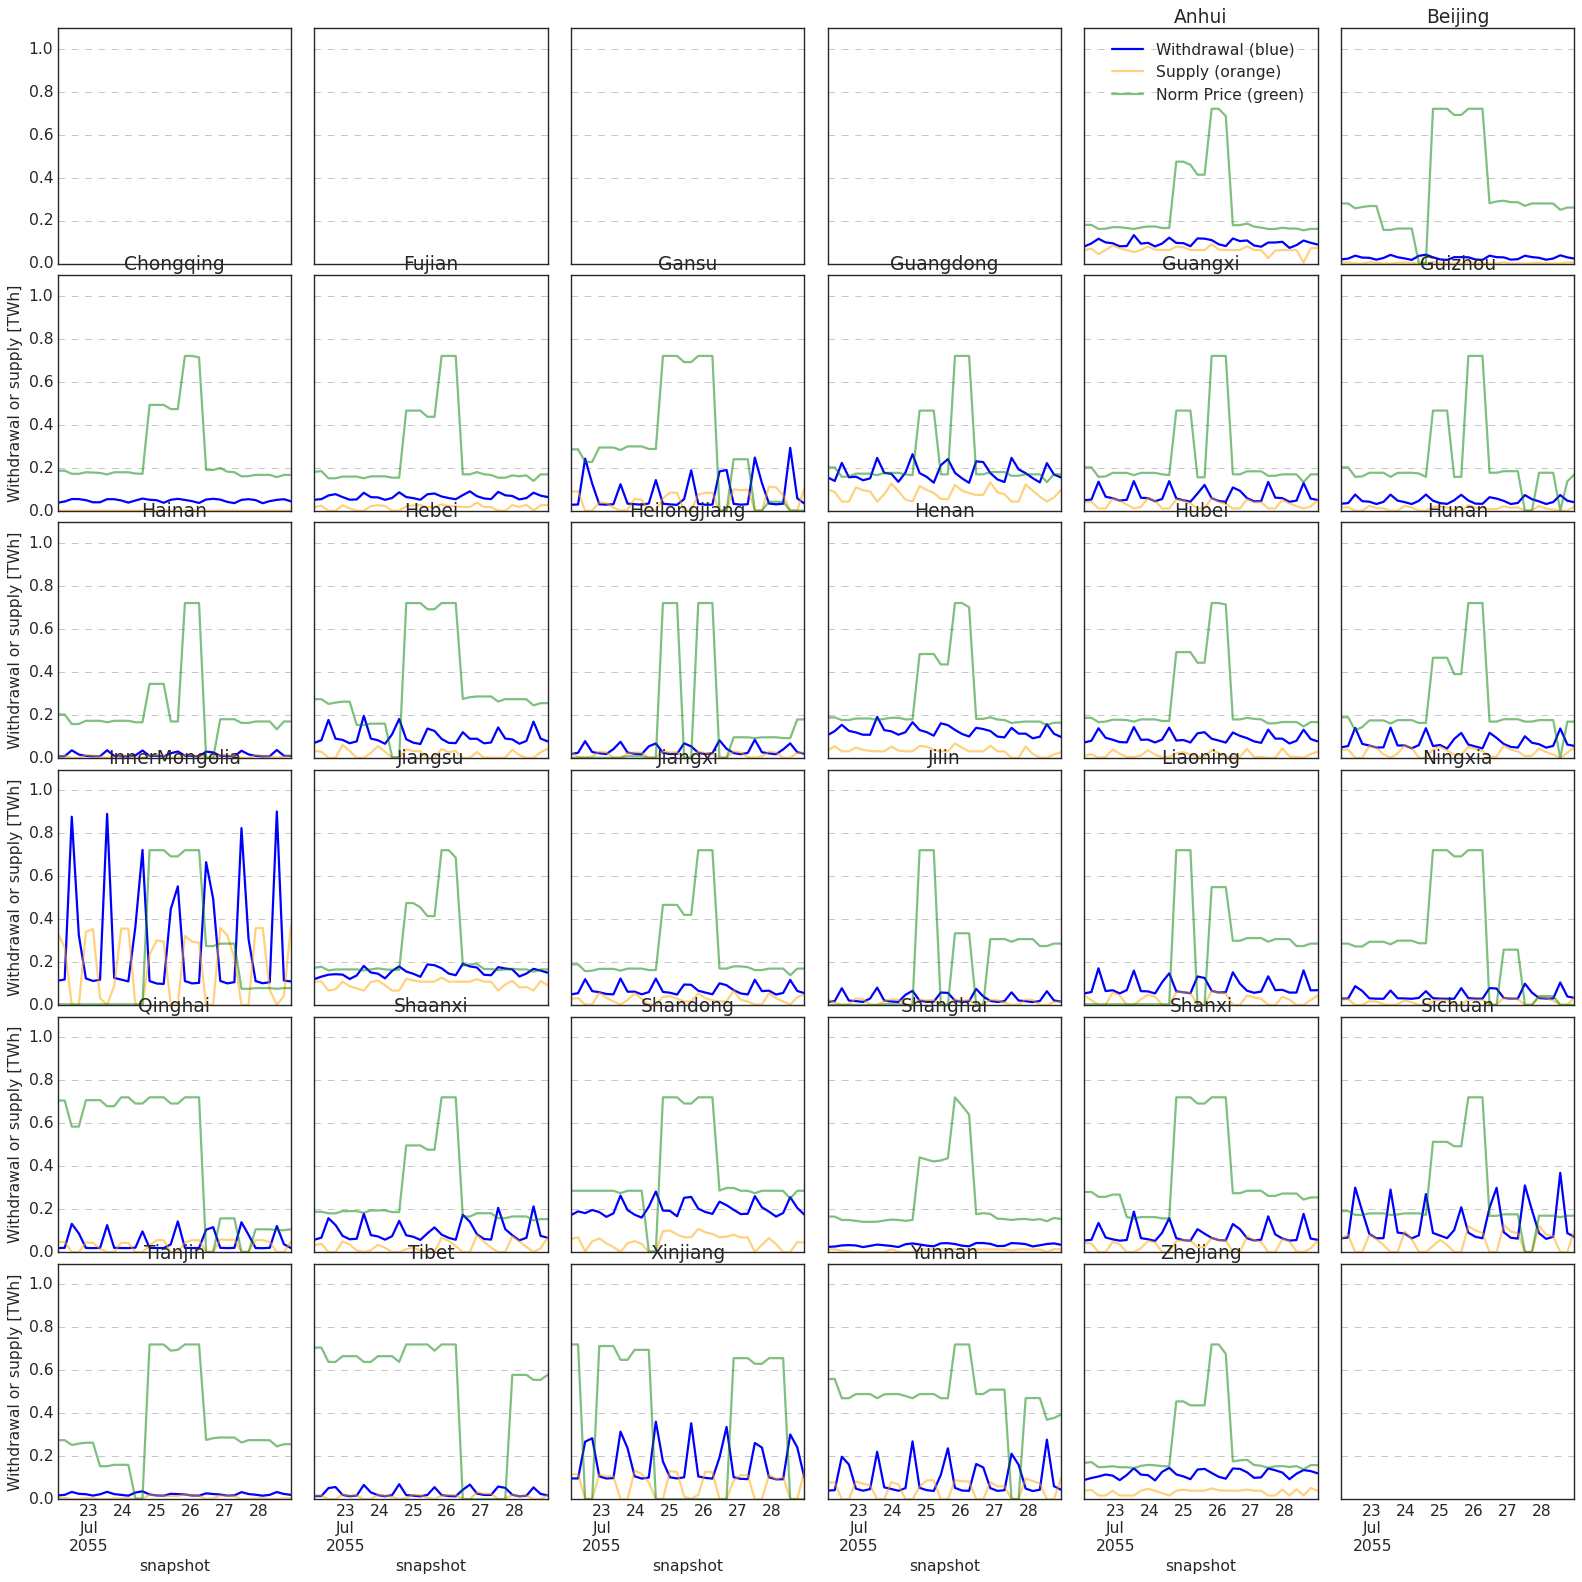

In [309]:

fig, axes = plt.subplots(6,6, sharex=True, sharey=True, figsize=(20,20))
norm_price =  n.buses_t["marginal_price"][PROV_NAMES].loc[f"{PLANNING_YEAR}-07-22":f"{PLANNING_YEAR}-07-28"]
norm_price/= norm_price.max()
norm_price*=(consum_regional*-1e-6).loc[f"{PLANNING_YEAR}-07-22":f"{PLANNING_YEAR}-07-28"].max().max()*0.8
consum_regional = consum_regional[PROV_NAMES]
for i,c in enumerate(consum_regional.columns):
    k, l = (i+4)//6, (i+4)%6
    (consum_regional[c]*-1e-6).loc[f"{PLANNING_YEAR}-07-22":f"{PLANNING_YEAR}-07-28"].plot(ax=axes[k,l])
    (supp_regional[c]*1e-6).loc[f"{PLANNING_YEAR}-07-22":f"{PLANNING_YEAR}-07-28"].plot(ax=axes[k,l], color = "orange", alpha = 0.5)
    norm_price[c].plot(ax=axes[k,l], color = "green", alpha = 0.5, legend = False)
    axes[k,l].set_title(c)
    axes[k,l].set_ylim(0, consum_regional.min().min()*-1e-6)

    if l ==0:
        axes[k,l].set_ylabel("Withdrawal or supply [TWh]")
    if k==0:
        axes[k,l].set_xlabel("Time")
axes[0, 4].legend(["Withdrawal (blue)", "Supply (orange)", "Norm Price (green)"])
fig.tight_layout()
fig.subplots_adjust(hspace=0.05, wspace=0.1)

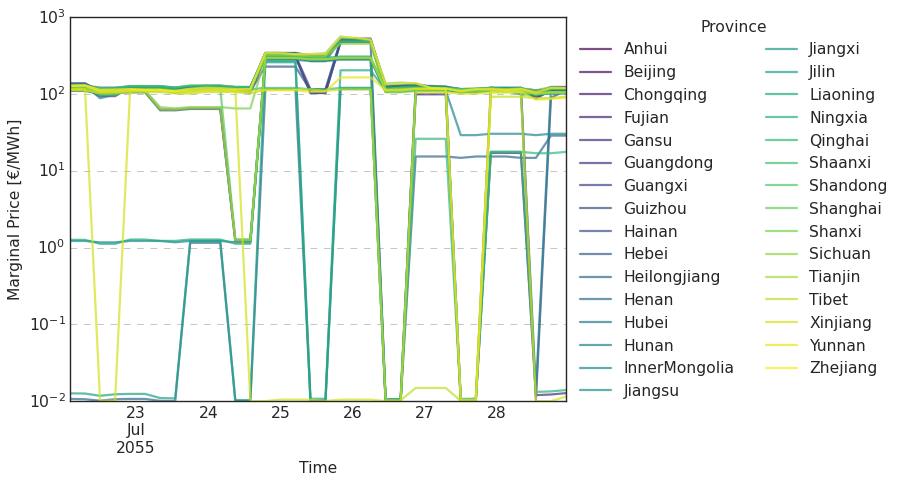

In [310]:
from constants import PROV_NAMES 
ax = n.buses_t["marginal_price"][PROV_NAMES].loc[f"{PLANNING_YEAR}-07-22":f"{PLANNING_YEAR}-07-28"].plot(cmap="viridis",alpha =0.7, logy=True)
ax.set_ylabel("Marginal Price [€/MWh]")
ax.set_xlabel("Time")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Province", ncol=2)

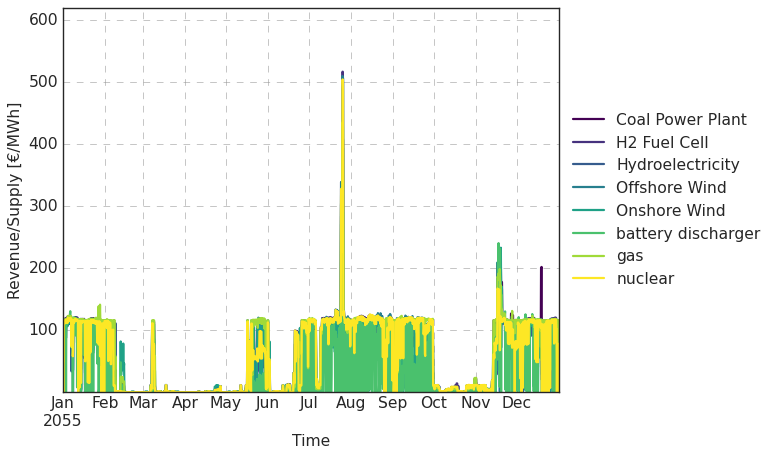

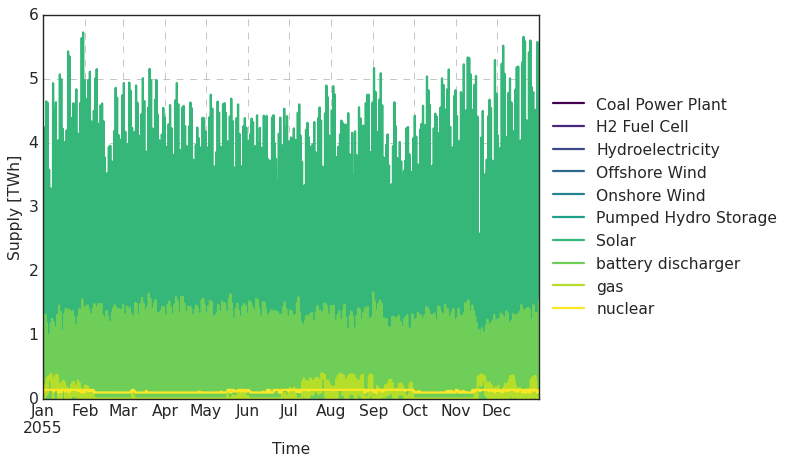

In [311]:
rev_and_exp = n.statistics.revenue(bus_carrier="AC", aggregate_time=False).fillna(0).groupby(level=1).sum().T
prod = n.statistics.energy_balance(bus_carrier="AC", aggregate_time=False).fillna(0)
prod = prod[~(prod<=0).all(axis=1)]
prod=prod.clip(lower=1e-5).groupby(level=1).sum().T
hourly_price = rev_and_exp.clip(lower=0)/prod
hourly_price = hourly_price.loc[:,(hourly_price>0).all(axis=0)]
ax = hourly_price.plot(logy=False, cmap = "viridis")
ax.set_ylim([1, hourly_price.max().max()*1.2])
ax.set_ylabel("Revenue/Supply [€/MWh]")
ax.set_xlabel("Time")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = (prod/1e6).plot(cmap="viridis", logy=False)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Carrier", ncol=2)
ax2.set_ylabel("Supply [TWh]")
ax2.set_xlabel("Time")
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

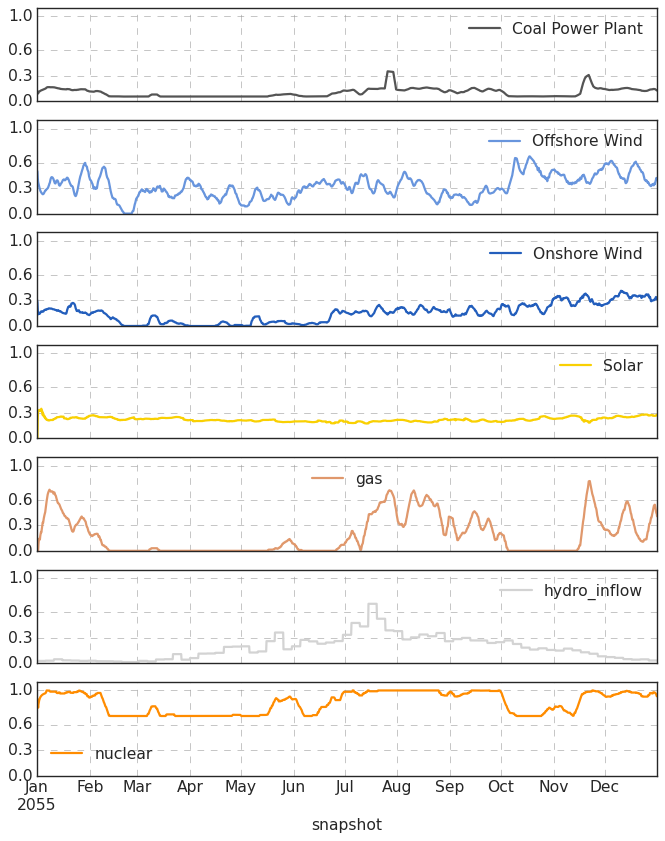

In [312]:
colors_lowered = {k.lower().rstrip():v for k,v in config["plotting"]["tech_colors"].items()}
cap_colors = {k: colors_lowered.get(k.lower().rstrip(), "lightgrey") for k in [c for c in capacity_factors.columns]}

# Apply rolling moving average filter
capacity_factors_smoothed = capacity_factors.rolling(window=24, min_periods=1).mean()

axes = capacity_factors_smoothed.dropna(axis=1, how="all").fillna(0).plot(subplots=True, figsize=(10,12), color= cap_colors)
for ax in axes:
    ax.set_ylim([0,1.1])
    ax.set_yticks([0,0.3, 0.6,1])

In [313]:

n.links.carrier.unique()

array(['hydroelectricity', 'stations', 'H2 Electrolysis', 'H2 fuel cell',
       'Sabatier', 'H2 pipeline', 'battery', 'battery discharger', 'AC'],
      dtype=object)

# COSTS & prices

In [314]:
n.generators.p_nom_opt.sum()

1.712459e+07

[]

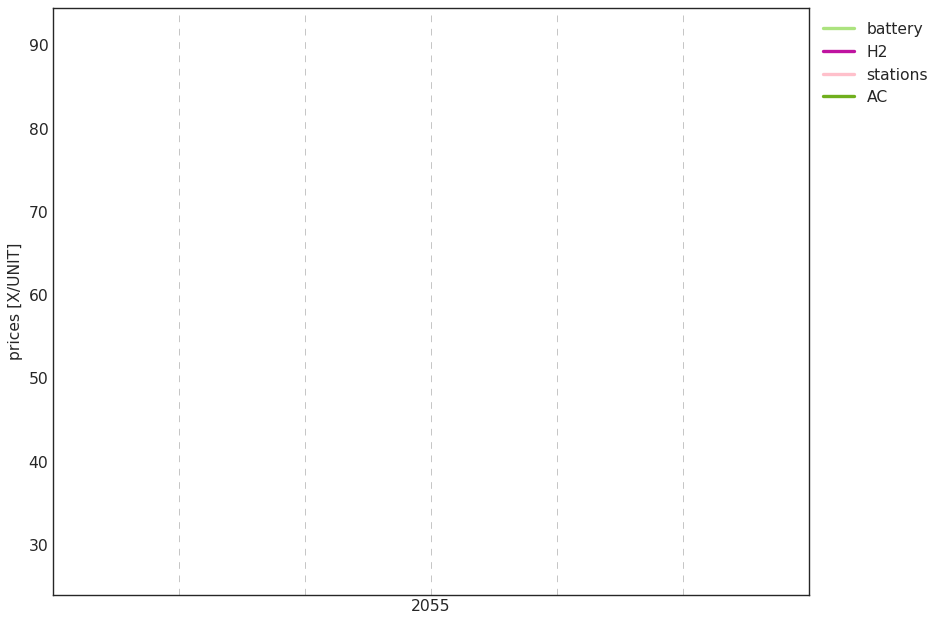

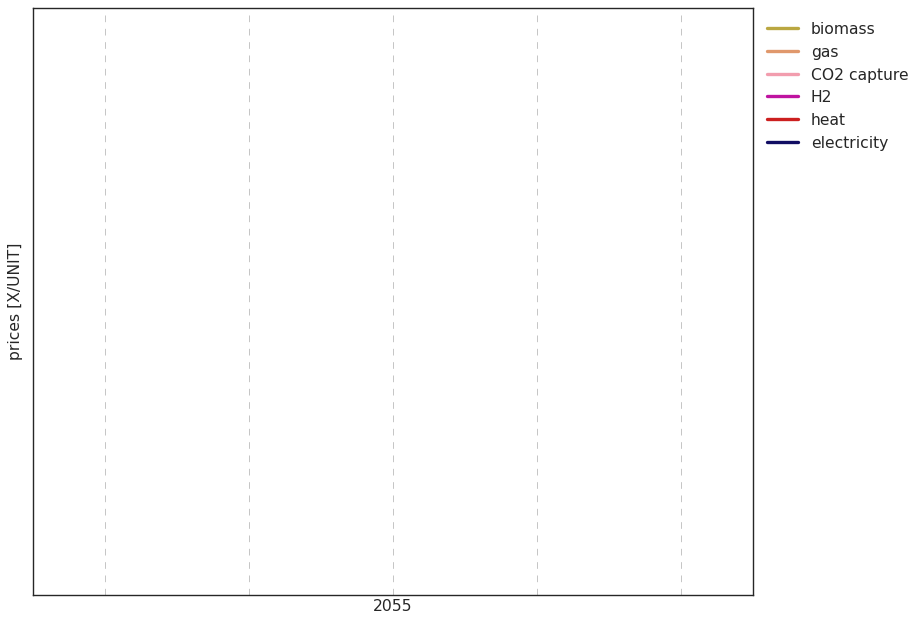

In [315]:
from plot_summary_all import plot_prices
paths = [os.path.join(results_dir, "summary", f"ntwk_{yr}") for yr in snakemake.config["scenario"]["planning_horizons"]]
data_paths = {
        "energy": [os.path.join(p, "energy.csv") for p in paths],
        "costs": [os.path.join(p, "costs.csv") for p in paths],
        "co2_price": [os.path.join(p, "metrics.csv") for p in paths],
        "time_averaged_prices": [os.path.join(p, "time_averaged_prices.csv") for p in paths],
        "weighted_prices": [os.path.join(p, "weighted_prices.csv") for p in paths],
        "co2_balance": [os.path.join(p, "co2_balance.csv") for p in paths],
        "energy_supply": [os.path.join(p, "supply_energy.csv") for p in paths],
        "capacity": [os.path.join(p, "capacities.csv") for p in paths],
    }

fig, ax = plt.subplots()
plot_prices(
    data_paths["time_averaged_prices"],
    config["plotting"],
    fig_name=None,
    ax=ax
)

fig, ax = plt.subplots()
plot_prices(
    data_paths["weighted_prices"],
    config["plotting"],
    fig_name=None,
    ax=ax,
)
ax.semilogy()

In [316]:
stores_inflow = n.stores_t.p.sum()
h2_stores= stores_inflow.loc[[c for c in stores_inflow.index if c.find("H2 Store")!=-1]]
h2_stores_inflow = h2_stores.where(h2_stores>0,0).sum()
h2_stores_outflow = h2_stores.where(h2_stores<0,0).sum()

# STATS

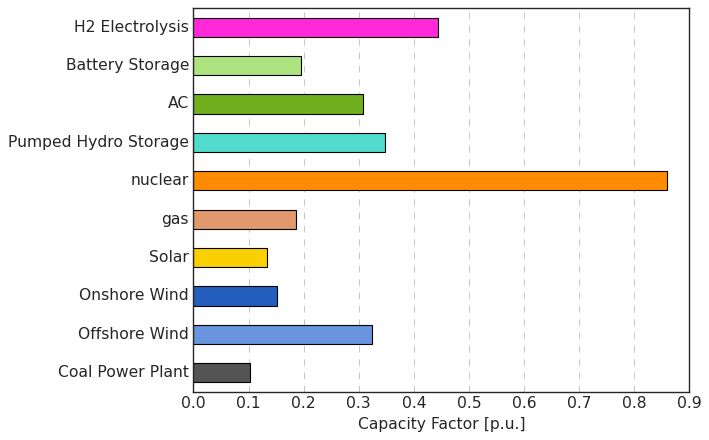

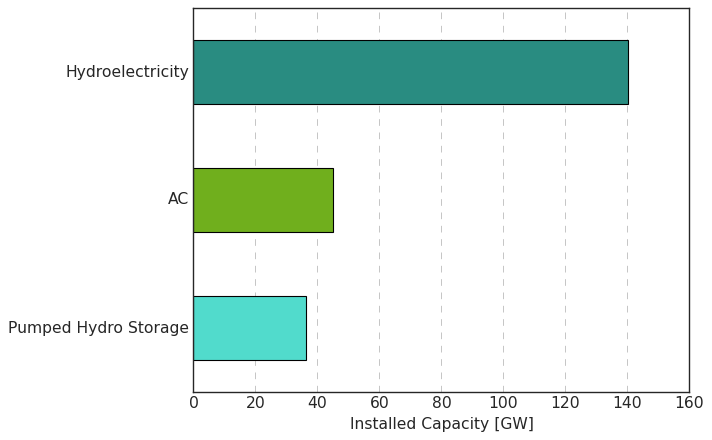

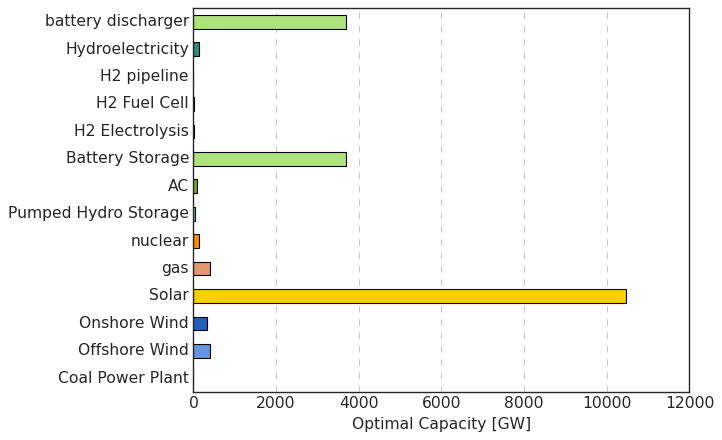

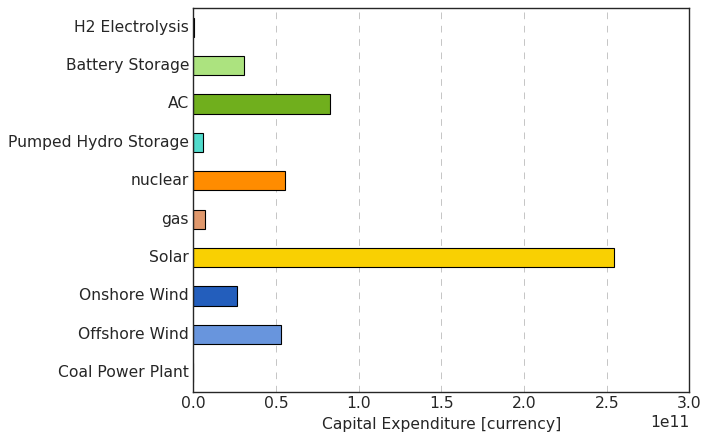

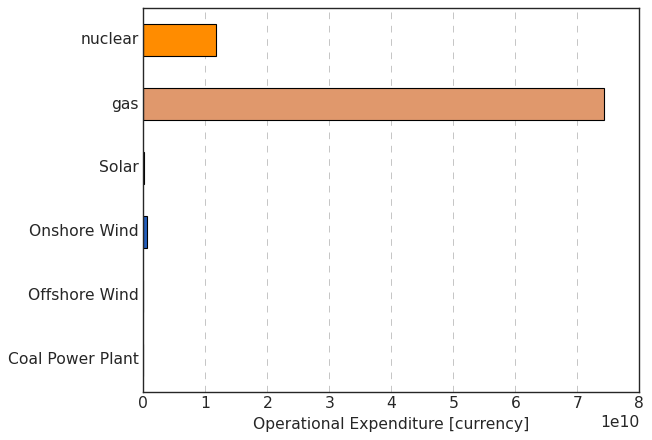

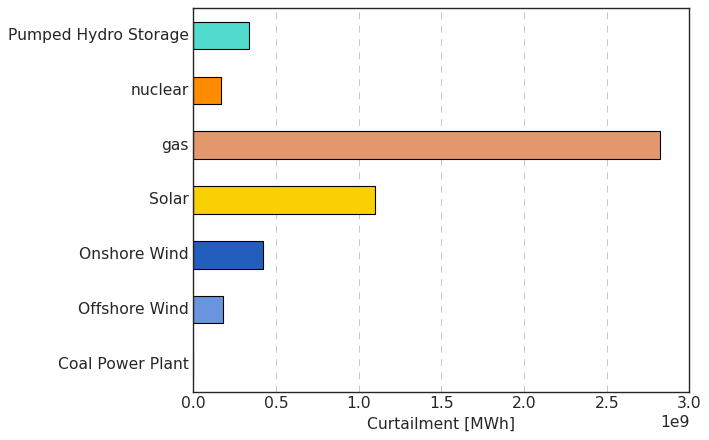

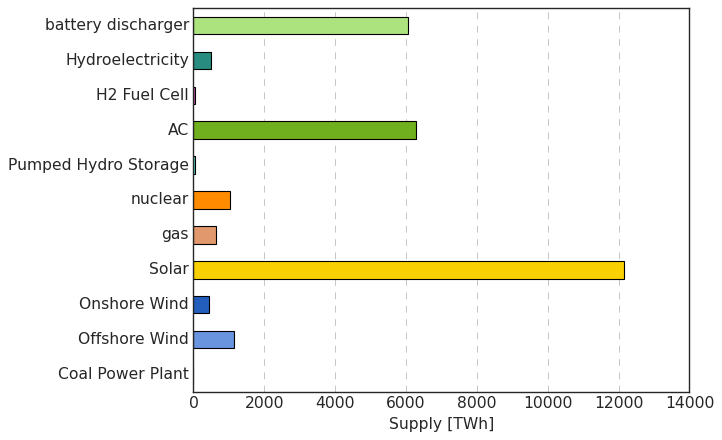

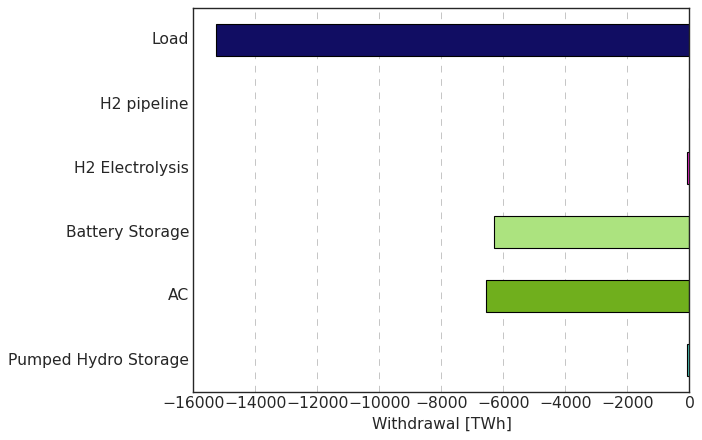

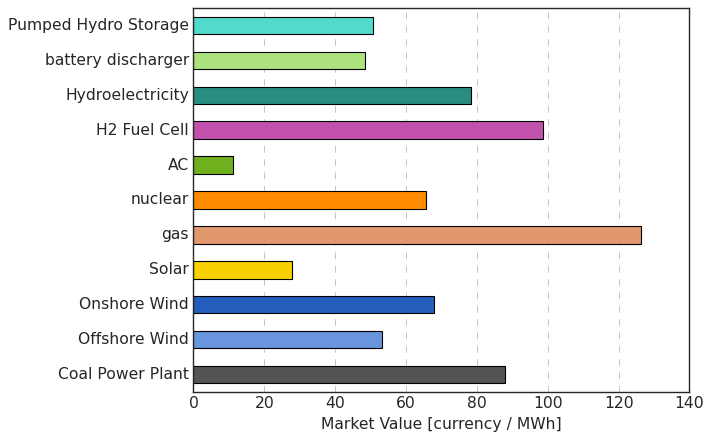

In [317]:
bus_carrier = "AC"
n.loads.carrier = "load"
n.carriers.loc["load", ["nice_name", "color"]] = "Load", "#110d63"
colors = n.carriers.set_index("nice_name").color.where(
    lambda s: s != "", "lightgrey"
)

def rename_index(ds):
    specific = ds.index.map(lambda x: f"{x[1]}\n({x[0]})")
    generic = ds.index.get_level_values("carrier")
    duplicated = generic.duplicated(keep=False)
    index = specific.where(duplicated, generic)
    return ds.set_axis(index)

def plot_static_per_carrier(ds, ax, drop_zero=True):
    if drop_zero:
        ds = ds[ds != 0]
    ds = ds.dropna()
    c = colors[ds.index.get_level_values("carrier")]
    ds = ds.pipe(rename_index)
    label = f"{ds.attrs['name']} [{ds.attrs['unit']}]"
    ds.plot.barh(color=c.values, xlabel=label, ax=ax)
    ax.grid(axis="y")

fig, ax = plt.subplots()
ds = n.statistics.capacity_factor(bus_carrier=bus_carrier).dropna()
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.installed_capacity(bus_carrier=bus_carrier).dropna()
if "Line" in ds.index:
    ds = ds.drop("Line")
ds = ds.drop(("Generator", "Load"), errors="ignore")
ds = ds / 1e3
ds.attrs["unit"] = "GW"
plot_static_per_carrier(ds.abs(), ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.optimal_capacity(bus_carrier=bus_carrier)
if "Line" in ds.index:
    ds = ds.drop("Line")
ds = ds.drop(("Generator", "Load"), errors="ignore")
ds = ds.abs() / 1e3
ds.attrs["unit"] = "GW"
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.capex(bus_carrier=bus_carrier)
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.opex(bus_carrier=bus_carrier)
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.curtailment(bus_carrier=bus_carrier)
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.supply(bus_carrier=bus_carrier)
if "Line" in ds.index:
    ds = ds.drop("Line")
ds = ds / 1e6
ds.attrs["unit"] = "TWh"
plot_static_per_carrier(ds, ax)
plt.show()

if snakemake.config["heat_coupling"]:
    fig, ax = plt.subplots()
    ds = n.statistics.supply(bus_carrier="heat")
    if "Line" in ds.index:
        ds = ds.drop("Line")
    ds = ds / 1e6
    ds.attrs["unit"] = "TWh"
    plot_static_per_carrier(ds, ax)
    plt.show()

fig, ax = plt.subplots()
ds = n.statistics.withdrawal(bus_carrier=bus_carrier)
if "Line" in ds.index:
    ds = ds.drop("Line")
ds = ds / -1e6
ds.attrs["unit"] = "TWh"
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.market_value(bus_carrier=bus_carrier)
plot_static_per_carrier(ds, ax)
plt.show()

In [318]:
def get_solver_tolerance(config: dict, tol_name = "BarConvTol")->float:
    """get the solver tolerance from the config 

    Args:
        config (dict): the config
        tol_name (str): the name of the tolerance option. Defaults to "BarConvTol"

    Returns:
        float: the value
    """    
    solver_opts = config["solving"]["solver"]["options"]
    return config["solving"]["solver_options"][solver_opts][tol_name]

def find_numerical_zeros(n, config, tolerance_name = "BarConvTol")->list:
    """
    Identify numerical zeros in the network's optimization results.

    This function checks for numerical zeros in the network's optimization results, 
    such as link capacities or weighted prices, based on a specified solver tolerance.

    Args:
        n (pypsa.Network): The PyPSA network object containing optimization results.
        config (dict): Configuration dictionary containing solver options.
        tolerance_name (str): The name of the solver tolerance option to use. Defaults to "BarConvTol".

    Returns:
        list: A list of items (e.g., links or buses) where numerical zeros are detected.
    """
 
    tol = get_solver_tolerance(config, tolerance_name)
    threshold = n.objective*float(tol)
    
    costs = pd.concat([n.statistics.expanded_capex(), n.statistics.opex()],axis=1)
    return costs.fillna(0).sum(axis=1).loc[costs.sum(axis=1) < threshold].index
    
    
num_zeros = find_numerical_zeros(n, config, tolerance_name = "BarConvTol")

In [319]:
def calc_lcoe(n: pypsa.Network, grouper = pypsa.statistics.get_carrier_and_bus_carrier, **kwargs)->pd.DataFrame:
    """calculate the LCOE for the network: (capex+opex)/supply.

    Args:
        network (pypsa.Network): the network for which LCOE is to be calaculated
        grouper (function | list, optional): function to group the data in network.statistics.
                Overwritten if groupby is passed in kwargs.
                Defaults to pypsa.statistics.get_carrier_and_bus_carrier. 
        **kwargs: other arguments to be passed to network.statistics
    Returns:
        pd.DataFrame: The LCOE for the network  with or without brownfield CAPEX. MV and delta

    """    
    if "groupby" in kwargs:
        grouper = kwargs.pop("groupby")

    rev= n.statistics.revenue(groupby=grouper,**kwargs)
    opex = n.statistics.opex(groupby=grouper,**kwargs)
    capex = n.statistics.expanded_capex(groupby=grouper,**kwargs)
    tot_capex = n.statistics.capex(groupby=grouper,**kwargs)
    supply = n.statistics.supply(groupby=grouper,**kwargs)

    profits = pd.concat([opex, capex, tot_capex, rev, supply], axis=1,  keys = ["OPEX", "CAPEX", "CAPEX_wBROWN", "Revenue", "supply"]).fillna(0)
    profits["rev-costs"]=profits.apply(lambda row: row.Revenue-row.CAPEX-row.OPEX, axis=1)
    profits["LCOE"] = profits.apply(lambda row: (row.CAPEX+row.OPEX)/row.supply, axis=1)
    profits["LCOE_wbrownfield"] = profits.apply(lambda row: (row.CAPEX_wBROWN+row.OPEX)/row.supply, axis=1)
    profits["MV"] = profits.apply(lambda row: row.Revenue/row.supply, axis=1)
    profits["profit_pu"]=profits["rev-costs"]/profits.supply
    profits.sort_values("profit_pu", ascending=False, inplace=True)
    
    return profits[profits.supply>0]




In [320]:
calc_lcoe(n, bus_carrier="AC", groupby=["location", "carrier"])

/p/tmp/ivanra/anaconda/ipykernel_4005664/1725557708.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  profits["LCOE"] = profits.apply(lambda row: (row.CAPEX+row.OPEX)/row.supply, axis=1)
/p/tmp/ivanra/anaconda/ipykernel_4005664/1725557708.py:25: RuntimeWarning: invalid value encountered in scalar divide
  profits["LCOE"] = profits.apply(lambda row: (row.CAPEX+row.OPEX)/row.supply, axis=1)
/p/tmp/ivanra/anaconda/ipykernel_4005664/1725557708.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  profits["LCOE_wbrownfield"] = profits.apply(lambda row: (row.CAPEX_wBROWN+row.OPEX)/row.supply, axis=1)
/p/tmp/ivanra/anaconda/ipykernel_4005664/1725557708.py:26: RuntimeWarning: invalid value encountered in scalar divide
  profits["LCOE_wbrownfield"] = profits.apply(lambda row: (row.CAPEX_wBROWN+row.OPEX)/row.supply, axis=1)
/p/tmp/ivanra/anaconda/ipykernel_4005664/1725557708.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  profits["MV"] = pro

OPEX       CAPEX  CAPEX_wBROWN  \
component location  carrier                                              
Link      Jiangxi   H2 fuel cell     0.00000     0.00000       0.00000   
          Anhui     H2 fuel cell     0.00000     0.00000       0.00000   
          Guangdong H2 fuel cell     0.00000     0.00000       0.00000   
          Guizhou   H2 fuel cell     0.00000     0.00000       0.00000   
          Hunan     H2 fuel cell     0.00000     0.00000       0.00000   
...                                      ...         ...           ...   
Generator Sichuan   coal          3949.31675  2796.91146    2796.91146   
          Gansu     coal          3390.06105  2674.36607    2674.36607   
          Tibet     coal          3315.19550  2770.02562    2770.02562   
          Qinghai   coal          3330.12131  2555.47313    2555.47313   
          Chongqing onwind           5.99016  2427.32395    2427.32395   

                                       Revenue        supply     rev-costs  \
component location  carrier                                                  
Link      Jiangxi   H2 fuel cell  8.628196e+08  8.666158e+06  8.628196e+08   
          Anhui     H2 fuel cell  2.255982e+09  2.296369e+07  2.255982e+09   
          Guangdong H2 fuel cell  2.411749e+06  2.530418e+04  2.411749e+06   
          Guizhou   H2 fuel cell  1.513870e+05  1.889598e+03  1.513870e+05   
          Hunan     H2 fuel cell  4.328392e+05  5.422014e+03  4.328392e+05   
...                                        ...           ...           ...   
Generator Sichuan   coal          1.810668e+03  2.302711e+01 -4.935560e+03   
          Gansu     coal          1.409824e+03  1.976628e+01 -4.654603e+03   
          Tibet     coal          1.306949e+03  1.932977e+01 -4.778272e+03   
          Qinghai   coal          1.059808e+03  1.941680e+01 -4.825787e+03   
          Chongqing onwind        3.488230e+02  4.909970e+00 -2.084491e+03   

                                        LCOE  LCOE_wbrownfield         MV  \
component location  carrier                                                 
Link      Jiangxi   H2 fuel cell    0.000000          0.000000  99.561957   
          Anhui     H2 fuel cell    0.000000          0.000000  98.241303   
          Guangdong H2 fuel cell    0.000000          0.000000  95.310309   
          Guizhou   H2 fuel cell    0.000000          0.000000  80.115979   
          Hunan     H2 fuel cell    0.000000          0.000000  79.829970   
...                                      ...               ...        ...   
Generator Sichuan   coal          292.968949        292.968949  78.632028   
          Gansu     coal          306.806699        306.806699  71.324716   
          Tibet     coal          314.810839        314.810839  67.613257   
          Qinghai   coal          303.118662        303.118662  54.581992   
          Chongqing onwind        495.586350        495.586350  71.043813   

                                   profit_pu  
component location  carrier                   
Link      Jiangxi   H2 fuel cell   99.561957  
          Anhui     H2 fuel cell   98.241303  
          Guangdong H2 fuel cell   95.310309  
          Guizhou   H2 fuel cell   80.115979  
          Hunan     H2 fuel cell   79.829970  
...                                      ...  
Generator Sichuan   coal         -214.336921  
          Gansu     coal         -235.481983  
          Tibet     coal         -247.197583  
          Qinghai   coal         -248.536670  
          Chongqing onwind       -424.542537  

[226 rows x 10 columns]

/p/tmp/ivanra/anaconda/ipykernel_4005664/1725557708.py:25: RuntimeWarning: invalid value encountered in scalar divide
  profits["LCOE"] = profits.apply(lambda row: (row.CAPEX+row.OPEX)/row.supply, axis=1)
/p/tmp/ivanra/anaconda/ipykernel_4005664/1725557708.py:26: RuntimeWarning: invalid value encountered in scalar divide
  profits["LCOE_wbrownfield"] = profits.apply(lambda row: (row.CAPEX_wBROWN+row.OPEX)/row.supply, axis=1)
/p/tmp/ivanra/anaconda/ipykernel_4005664/1725557708.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  profits["MV"] = profits.apply(lambda row: row.Revenue/row.supply, axis=1)
/p/tmp/ivanra/anaconda/ipykernel_4005664/1725557708.py:25: RuntimeWarning: invalid value encountered in scalar divide
  profits["LCOE"] = profits.apply(lambda row: (row.CAPEX+row.OPEX)/row.supply, axis=1)
/p/tmp/ivanra/anaconda/ipykernel_4005664/1725557708.py:26: RuntimeWarning: invalid value encountered in scalar divide
  profits["LCOE_wbrownfield"] = profits.apply(lambda 

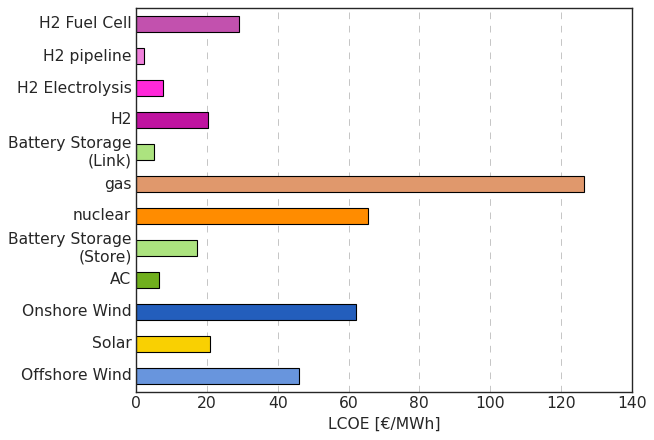

/p/tmp/ivanra/anaconda/ipykernel_4005664/1725557708.py:25: RuntimeWarning: invalid value encountered in scalar divide
  profits["LCOE"] = profits.apply(lambda row: (row.CAPEX+row.OPEX)/row.supply, axis=1)
/p/tmp/ivanra/anaconda/ipykernel_4005664/1725557708.py:26: RuntimeWarning: invalid value encountered in scalar divide
  profits["LCOE_wbrownfield"] = profits.apply(lambda row: (row.CAPEX_wBROWN+row.OPEX)/row.supply, axis=1)
/p/tmp/ivanra/anaconda/ipykernel_4005664/1725557708.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  profits["MV"] = profits.apply(lambda row: row.Revenue/row.supply, axis=1)


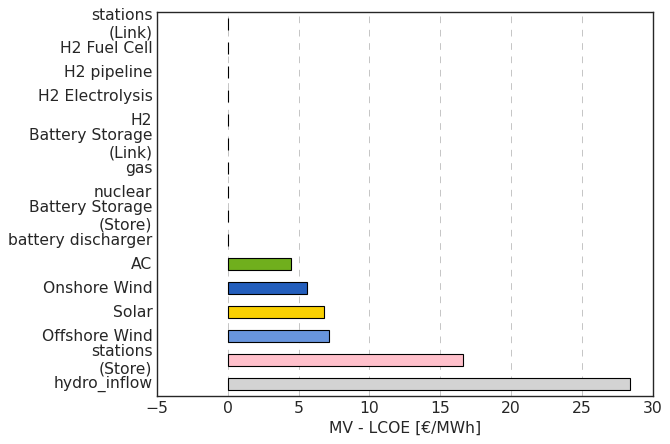

In [321]:
rev_costs = calc_lcoe(n, groupby=None)
rev_costs = calc_lcoe(n, groupby=None)
ds = rev_costs["LCOE"]
ds.attrs={"name":"LCOE", "unit":"€/MWh"}
fig, ax = plt.subplots()
plot_static_per_carrier(ds[~ds.index.isin(num_zeros)], ax)
plt.show()

rev_costs = calc_lcoe(n, groupby=None)
ds = rev_costs["profit_pu"]
ds.attrs={"name":"MV - LCOE", "unit":"€/MWh"}
fig, ax = plt.subplots()
plot_static_per_carrier(ds[~ds.index.isin(num_zeros)], ax)
plt.show()

# Network topology
irrelevant as don't have lines

In [322]:
n.determine_network_topology()
n.sub_networks["n_branches"] = [
    len(sn.branches()) for sn in n.sub_networks.obj
]
n.sub_networks["n_buses"] = [len(sn.buses()) for sn in n.sub_networks.obj]



# CO2 costs

In [323]:
if "emission_prices" in n.meta:
    em_price_gas = float(n.statistics.supply(comps="Generator")["gas"]*n.meta["emission_prices"]["co2"]*0.2/0.43)
    print(f"paid by gas {em_price_gas:.2e}")
    print("CO2 price: ", n.meta["emission_prices"]["co2"], " Eur/t")
n.global_constraints

paid by gas 4.15e+10
CO2 price:  139.0952804209338  Eur/t


Empty DataFrame
Columns: [type, investment_period, carrier_attribute, sense, constant, mu]
Index: []

In [324]:
costs.rename(columns={"Unnamed: 0":"expend", "Unnamed: 1": "carrier"}, inplace=True)
costs_ = costs.set_index(["expend", "carrier"]).T
costs_.T.groupby("expend").sum().T.sort_index().plot(kind="bar", stacked=True)

AttributeError: 'numpy.float64' object has no attribute 'rename'

In [ ]:
costs_
costs_s = costs_.T.sum()
dt = 5
costs_s.index = costs_s.index.astype(int)
co2_costs = co2.set_index("Year")["costs bnE"]
costs_df = pd.DataFrame({'Costs pw bn eur': costs_s, 'CO2 Costs bn eur': co2_costs})
costs_df["Costs no co2 bn eur"] = costs_df["Costs pw bn eur"] - costs_df["CO2 Costs bn eur"]
costs_df["discount"]=costs_df.apply(lambda x: 1.02**(x.name-min(costs_df.index)), axis =1)
discounted_costs = costs_df.apply(lambda x: x/x.discount, axis=1)
discounted_costs, costs_df.apply(lambda x: x.sum()*5 ), discounted_costs.apply(lambda x: x.sum()*5 )

AttributeError: 'numpy.float64' object has no attribute 'index'

<Axes: >

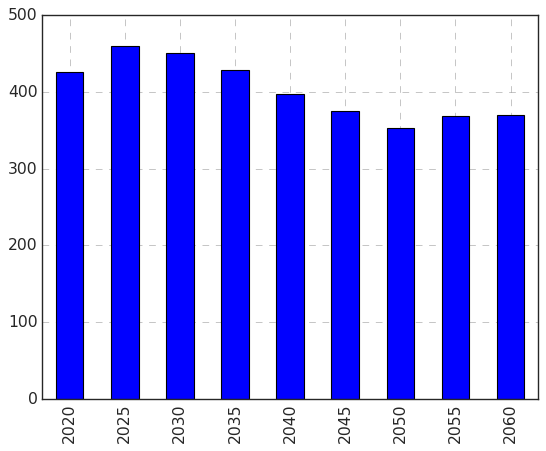

In [ ]:
discounted_costs["Costs pw bn eur"].plot(kind="bar", stacked=True, color="blue", label="Costs pw bn eur")

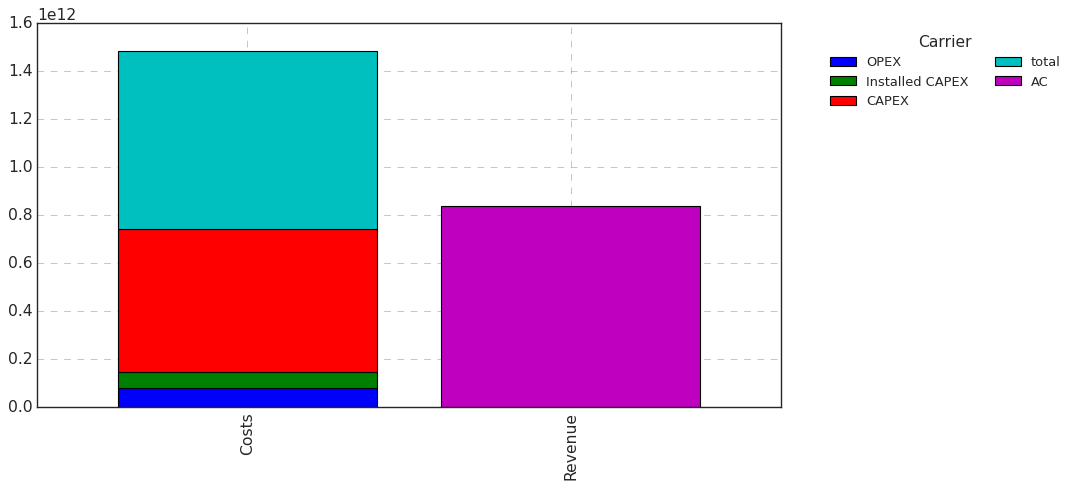

In [ ]:

ax = costs_.T.unstack(level=0).T.sort_index().plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 6), 
    width=0.8, 
    legend=True)


# Customize the legend with a dictionary, including bbox_to_anchor
legend_kw = {
    'title': 'Carrier',          # Title of the legend
    'loc': 'upper left',              # Legend location (usually 'upper left' or 'best')
    'fontsize': 'small',              # Font size for the legend
    'frameon': False,                 # Remove the legend's frame
    'ncol': 2,                        # Number of columns in the legend
    'bbox_to_anchor': (1.05, 1),      # Adjust the legend's position (x, y)
    'borderaxespad': 0.5              # Padding between the legend and plot
}

# Apply the legend customization
ax.legend(**legend_kw)

# Validation

In [ ]:
import seaborn as sns

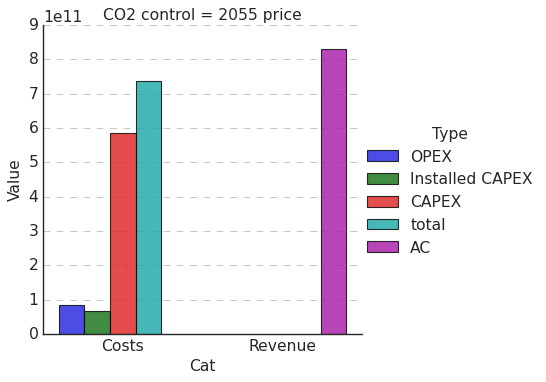

In [ ]:
capex_ = n.statistics.expanded_capex().sum()
installed_capex_ = n.statistics.installed_capex().sum()
opex_ = n.statistics.opex().sum()
costs_ = pd.DataFrame(
    {
        "OPEX": opex_,
        "Installed CAPEX": installed_capex_,
        "CAPEX": capex_,
        "total": capex_ + installed_capex_ + opex_,
    }, index = ["Costs"]
).stack()
revenue_ = n.statistics.revenue(comps="Load", bus_carrier="AC").sum()
costs_.loc[("Revenue", "AC")]=revenue_*-1
all_ = pd.concat({f"{PLANNING_YEAR} price":costs_}, names=["CO2 control"])
all_.index.names = ["CO2 control", "Cat", "Type"]
all_ = pd.DataFrame(all_, columns = ["Value"])


sns.catplot(all_,x="Cat", y="Value",  hue="Type", col = "CO2 control", dodge=True, kind="bar", alpha =0.8)


In [ ]:
rev= n.statistics.revenue(groupby=pypsa.statistics.get_carrier_and_bus_carrier)
opex = n.statistics.opex(groupby=pypsa.statistics.get_carrier_and_bus_carrier)
capex = n.statistics.expanded_capex(groupby=pypsa.statistics.get_carrier_and_bus_carrier)
supply = n.statistics.supply(groupby=pypsa.statistics.get_carrier_and_bus_carrier)
index = rev.index.union(opex.index).union(capex.index)
rents = pd.concat([opex, capex, rev, supply], axis=1,  keys = ["OPEX", "CAPEX", "Revenue", "supply"]).fillna(0)
rents["delta"]=rents.apply(lambda row: row.Revenue-row.CAPEX-row.OPEX, axis=1)
rents["delta_pu"]=rents.delta/rents.supply
rents.sort_values("delta_pu", ascending=False, inplace=True)


In [ ]:
supply

component    carrier               bus_carrier    
Generator    Coal Power Plant      AC                 1.624823e+03
             Offshore Wind         AC                 1.100459e+09
             Onshore Wind          AC                 4.354118e+08
             Solar                 AC                 1.215372e+10
             gas                   gas                1.493014e+09
             hydro_inflow          stations           3.515886e+08
             nuclear               AC                 1.061951e+09
Store        Battery Storage       Battery Storage    6.119539e+09
             H2                    H2                 5.275977e+07
             gas                   gas                7.426576e+08
             stations              stations           3.525756e+08
StorageUnit  Pumped Hydro Storage  AC                 4.499787e+07
Link         AC                    AC                 6.248643e+09
             Battery Storage       Battery Storage    6.171813e+09
           

In [ ]:
rev

component    carrier               bus_carrier    
Generator    Coal Power Plant      AC                 1.753387e+05
             Offshore Wind         AC                 5.735242e+10
             Onshore Wind          AC                 2.928109e+10
             Solar                 AC                 3.364751e+11
             gas                   gas                6.781633e+10
             hydro_inflow          stations           9.561899e+09
             nuclear               AC                 6.948380e+10
Store        Battery Storage       Battery Storage    1.066016e+11
             H2                    H2                 1.026675e+09
             gas                   gas                2.209604e+04
             stations              stations           5.573907e+09
StorageUnit  Pumped Hydro Storage  AC                 2.599013e+09
Link         AC                    AC                 6.998796e+10
             Battery Storage       AC                -1.565108e+11
           

<Axes: xlabel='carrier,bus_carrier', ylabel='Rev-Costs Eur/MWh'>

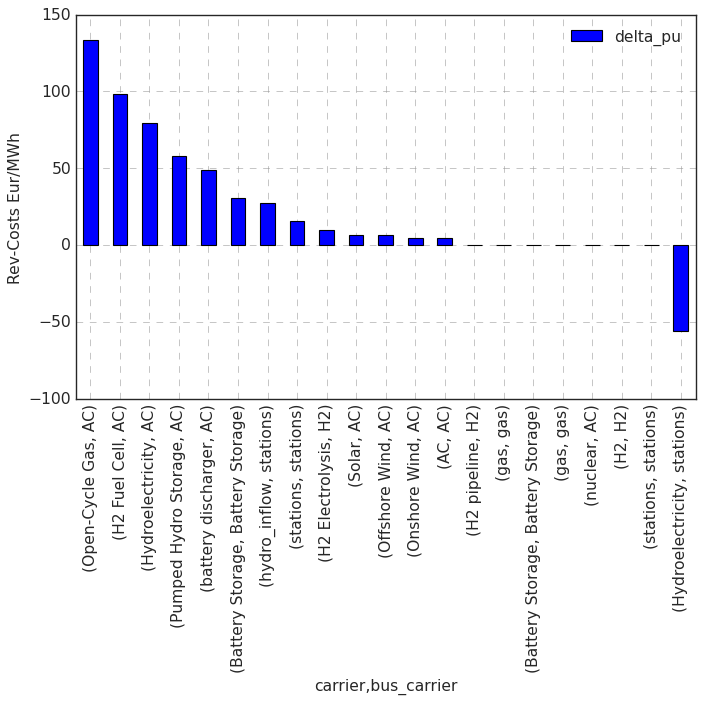

In [ ]:
rents[rents.supply>1e5].droplevel(0).sort_values("delta_pu", ascending=False).plot.bar( y="delta_pu", stacked=True, figsize=(10, 6), ylabel="Rev-Costs Eur/MWh")

# EXAMPLES